# Women's Premier League 2024 - Comprehensive Cricket Analytics

## Project Overview

This notebook presents a detailed statistical analysis of the Women's Premier League (WPL) 2024 season, examining team performances, individual player statistics, match dynamics, and venue-specific trends.

### Analysis Scope
- **Tournament Coverage**: Complete WPL 2024 season analysis
- **Data Sources**: Ball-by-ball delivery data and match results
- **Key Metrics**: Team performance, individual statistics, venue analysis, strategic insights
- **Methodology**: Statistical analysis with professional visualizations

### Key Objectives
1. Evaluate team performance and ranking patterns
2. Identify top-performing players in batting and bowling
3. Analyze venue-specific playing conditions and strategies
4. Examine match progression dynamics and scoring patterns
5. Provide actionable insights for cricket analytics

## Data Import and Environment Setup

This section establishes the analytical environment by importing necessary libraries for data manipulation, statistical analysis, and visualization.

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as mpl_colors
import warnings
from tqdm import tqdm
import math

In [103]:
# from kaggle
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

def hex_to_rgb(h):
    h = h.lstrip('#')
    return tuple(int(h[i:i+2], 16)/255 for i in (0, 2, 4))

palette = [
    '#2E765E', '#1d4a60', '#5DD9FB', '#568f8b', '#B6E5D8', '#cd7e59', '#BE0C3D', '#ddb247', '#d15252',
    '#b4d2b1', '#7fc8f8', '#2e294e', '#545454', '#008000', '#0c0f0a', '#2ec4b6', '#ff9f1c', '#086788',
    '#c1121f', '#540b0e', '#02c39a', '#cd7e59', '#BE0C3D', '#023e7d', '#5a189a', '#b4d2b1',
]
palette_rgb = [hex_to_rgb(x) for x in palette]
cmap = mpl_colors.ListedColormap(palette_rgb)
colors = cmap.colors
bg_color = '#EFEAE0'

custom_params = {
    "axes.spines.right": False,
    "axes.spines.top": False,
    'grid.alpha':0.3,
    'figure.figsize': (16, 6),
    'axes.titlesize': 'Large',
    'axes.labelsize': 'Large',
    'figure.facecolor': bg_color,
    'axes.facecolor': bg_color
}

sns.set_theme(
    style='whitegrid',
    palette=sns.color_palette(palette),
    rc=custom_params
)
team_specific_palette = {
    'UP Warriorz': '#50276E',
    'Mumbai Indians': '#0466c8',
    'Delhi Capitals': '#03045e',
    'Gujarat Giants': '#FDA736',
    'Royal Challengers Bangalore': '#DA1818'
}

warnings.simplefilter("ignore", UserWarning)

In [104]:
# Check colors list length
print(f"Number of colors available: {len(colors)}")
print(f"Colors list: {colors}")

Number of colors available: 26
Colors list: [(0.1803921568627451, 0.4627450980392157, 0.3686274509803922), (0.11372549019607843, 0.2901960784313726, 0.3764705882352941), (0.36470588235294116, 0.8509803921568627, 0.984313725490196), (0.33725490196078434, 0.5607843137254902, 0.5450980392156862), (0.7137254901960784, 0.8980392156862745, 0.8470588235294118), (0.803921568627451, 0.49411764705882355, 0.34901960784313724), (0.7450980392156863, 0.047058823529411764, 0.23921568627450981), (0.8666666666666667, 0.6980392156862745, 0.2784313725490196), (0.8196078431372549, 0.3215686274509804, 0.3215686274509804), (0.7058823529411765, 0.8235294117647058, 0.6941176470588235), (0.4980392156862745, 0.7843137254901961, 0.9725490196078431), (0.1803921568627451, 0.1607843137254902, 0.3058823529411765), (0.32941176470588235, 0.32941176470588235, 0.32941176470588235), (0.0, 0.5019607843137255, 0.0), (0.047058823529411764, 0.058823529411764705, 0.0392156862745098), (0.1803921568627451, 0.7686274509803922, 0

## Data Loading and Preparation

### Dataset Description
The analysis utilizes two primary datasets:

1. **deliveries.csv**: Ball-by-ball data containing detailed information about each delivery
   - Match details, batting/bowling teams, player actions
   - Runs scored, wickets taken, extras conceded
   - Over-by-over progression data

2. **matches.csv**: Match-level results and metadata
   - Team information, toss decisions, match outcomes
   - Venue details, player of the match awards
   - Win conditions (runs/wickets)

### Data Quality Checks
- Verification of data completeness and consistency
- Validation of key relationships between datasets
- Assessment of missing values and data integrity

In [105]:
deliveries_df = pd.read_csv('deliveries.csv')
result_df= pd.read_csv('matches.csv')

In [106]:
deliveries_df= deliveries_df[deliveries_df['season'] == 2024]
result_df= result_df[result_df['season'] == 2024]

deliveries_df['over'] = deliveries_df['ball'].apply(lambda x: str(x).split('.')[1]).astype(int)
deliveries_df['Over_ball'] = deliveries_df['ball'].apply(lambda x: str(x).split('.')[0]).astype(int)
deliveries_df['total_runs'] = deliveries_df['runs_off_bat'] + deliveries_df['extras']

display(deliveries_df.head(10))
display(result_df.head(10))

display(deliveries_df.info())
display(result_df.info())

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,over,Over_ball,total_runs
0,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.1,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
1,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.2,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,0,0
2,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.3,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ismail,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,0,1
3,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.4,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,0,0
4,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.5,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,0
5,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,0.6,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ismail,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,0,0
6,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.1,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ishaque,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,0
7,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.2,Delhi Capitals,Mumbai Indians,MM Lanning,Shafali Verma,S Ishaque,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1
8,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.3,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ishaque,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,0
9,1417716,2024,2024-02-23,"M Chinnaswamy Stadium, Bengaluru",1,1.4,Delhi Capitals,Mumbai Indians,Shafali Verma,MM Lanning,S Ishaque,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,1,0


,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets
0,2024,Delhi Capitals,Mumbai Indians,2024/02/23,1,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,field,H Kaur,A Bengeri,VG Rathi,M Krishnadas,GS Lakshmi,Mumbai Indians,NaN,4.0
1,2024,Royal Challengers Bangalore,UP Warriorz,2024/02/24,2,M Chinnaswamy Stadium,Bengaluru,UP Warriorz,field,S Asha,Abhijit Bhattacharya,N Janani,Mohamad Rafi,RB Kalita,Royal Challengers Bangalore,2.0,NaN
2,2024,Gujarat Giants,Mumbai Indians,2024/02/25,3,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,field,AC Kerr,Gayathri Venugopal,P Jayapal,A Bengeri,AV Narvekar,Mumbai Indians,NaN,5.0
3,2024,UP Warriorz,Delhi Capitals,2024/02/26,4,M Chinnaswamy Stadium,Bengaluru,Delhi Capitals,field,M Kapp,M Krishnadas,PG Pathak,Abhijit Bhattacharya,VR Nagre,Delhi Capitals,NaN,9.0
4,2024,Gujarat Giants,Royal Challengers Bangalore,2024/02/27,5,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,Renuka Singh,Mohamad Rafi,P Joshi,P Jayapal,M Mangla,Royal Challengers Bangalore,NaN,8.0
5,2024,Mumbai Indians,UP Warriorz,2024/02/28,6,M Chinnaswamy Stadium,Bengaluru,UP Warriorz,field,KP Navgire,A Bengeri,VG Rathi,PG Pathak,GS Lakshmi,UP Warriorz,NaN,7.0
6,2024,Delhi Capitals,Royal Challengers Bangalore,2024/02/29,7,M Chinnaswamy Stadium,Bengaluru,Royal Challengers Bangalore,field,M Kapp,Abhijit Bhattacharya,N Janani,P Joshi,RB Kalita,Delhi Capitals,25.0,NaN
7,2024,Gujarat Giants,UP Warriorz,2024/03/01,8,M Chinnaswamy Stadium,Bengaluru,UP Warriorz,field,GM Harris,Gayathri Venugopal,P Jayapal,VG Rathi,AV Narvekar,UP Warriorz,NaN,6.0
8,2024,Royal Challengers Bangalore,Mumbai Indians,2024/03/02,9,M Chinnaswamy Stadium,Bengaluru,Mumbai Indians,field,AC Kerr,M Krishnadas,PG Pathak,N Janani,VR Nagre,Mumbai Indians,NaN,7.0
9,2024,Delhi Capitals,Gujarat Giants,2024/03/03,10,M Chinnaswamy Stadium,Bengaluru,Gujarat Giants,field,JL Jonassen,Mohamad Rafi,P Joshi,Gayathri Venugopal,M Mangla,Delhi Capitals,25.0,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   match_id                5177 non-null   int64  
 1   season                  5177 non-null   int64  
 2   start_date              5177 non-null   object 
 3   venue                   5177 non-null   object 
 4   innings                 5177 non-null   int64  
 5   ball                    5177 non-null   float64
 6   batting_team            5177 non-null   object 
 7   bowling_team            5177 non-null   object 
 8   striker                 5177 non-null   object 
 9   non_striker             5177 non-null   object 
 10  bowler                  5177 non-null   object 
 11  runs_off_bat            5177 non-null   int64  
 12  extras                  5177 non-null   int64  
 13  wides                   139 non-null    float64
 14  noballs                 14 non-null     

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           22 non-null     int64  
 1   team1            22 non-null     object 
 2   team2            22 non-null     object 
 3   date             22 non-null     object 
 4   match_number     22 non-null     object 
 5   venue            22 non-null     object 
 6   city             22 non-null     object 
 7   toss_winner      22 non-null     object 
 8   toss_decision    22 non-null     object 
 9   player_of_match  22 non-null     object 
 10  umpire1          22 non-null     object 
 11  umpire2          22 non-null     object 
 12  reserve_umpire   22 non-null     object 
 13  match_referee    22 non-null     object 
 14  winner           22 non-null     object 
 15  winner_runs      11 non-null     float64
 16  winner_wickets   11 non-null     float64
dtypes: float64(2), int

None

In [107]:
# Tournament Overview Statistics
total_teams = len(set(result_df['team1'].unique()).union(set(result_df['team2'].unique())))
teams_list = set(result_df['team1'].unique()).union(set(result_df['team2'].unique()))
total_venues = result_df['venue'].nunique()
venues_list = result_df['venue'].unique()
total_players = len(set(deliveries_df['striker'].unique()).union(set(deliveries_df['non_striker'].unique())).union(set(deliveries_df['bowler'].unique())))
total_matches = result_df.shape[0]
total_runs = deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum()
total_deliveries = deliveries_df.shape[0]
total_wickets = deliveries_df['player_dismissed'].notna().sum()

print("WPL 2024 Tournament Statistics:")
print("=" * 40)
print(f"Total teams: {total_teams}")
print(f"Teams: {', '.join(sorted(teams_list))}")
print(f"\nTotal venues: {total_venues}")
print(f"Venues: {', '.join(venues_list)}")
print(f"\nTotal players: {total_players}")
print(f"Total matches: {total_matches}")
print(f"Total runs scored: {total_runs:,}")
print(f"Total deliveries bowled: {total_deliveries:,}")
print(f"Total wickets taken: {total_wickets}")

WPL 2024 Tournament Statistics:
Total teams: 5
Teams: Delhi Capitals, Gujarat Giants, Mumbai Indians, Royal Challengers Bangalore, UP Warriorz

Total venues: 2
Venues: M Chinnaswamy Stadium, Arun Jaitley Stadium

Total players: 74
Total matches: 22
Total runs scored: 6,581
Total deliveries bowled: 5,177
Total wickets taken: 267


In [108]:
cols = [
    'season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city', 'toss_winner', 'toss_decision', 'player_of_match', 'winner', 'winner_runs', 'winner_wickets'
]

result_df[result_df['match_number'] == 'Final'][cols].sort_values(by='season')

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,winner,winner_runs,winner_wickets
21,2024,Delhi Capitals,Royal Challengers Bangalore,2024/03/17,Final,Arun Jaitley Stadium,Delhi,Delhi Capitals,bat,S Molineux,Royal Challengers Bangalore,NaN,8.0


## Season 2024 Overview and Statistical Summary

This section provides a comprehensive overview of the WPL 2024 tournament structure, including:

### Tournament Statistics
- Total matches played and participating teams
- Overall scoring patterns and tournament dynamics
- Key performance indicators across the season

### Data Validation
- Cross-verification between delivery-level and match-level data
- Consistency checks for team names, venues, and player information
- Assessment of data coverage and completeness

C:\Users\shres\AppData\Local\Temp\ipykernel_19400\847347001.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=matches_per_season.index, x=matches_per_season.values, palette = colors, orient= 'h')


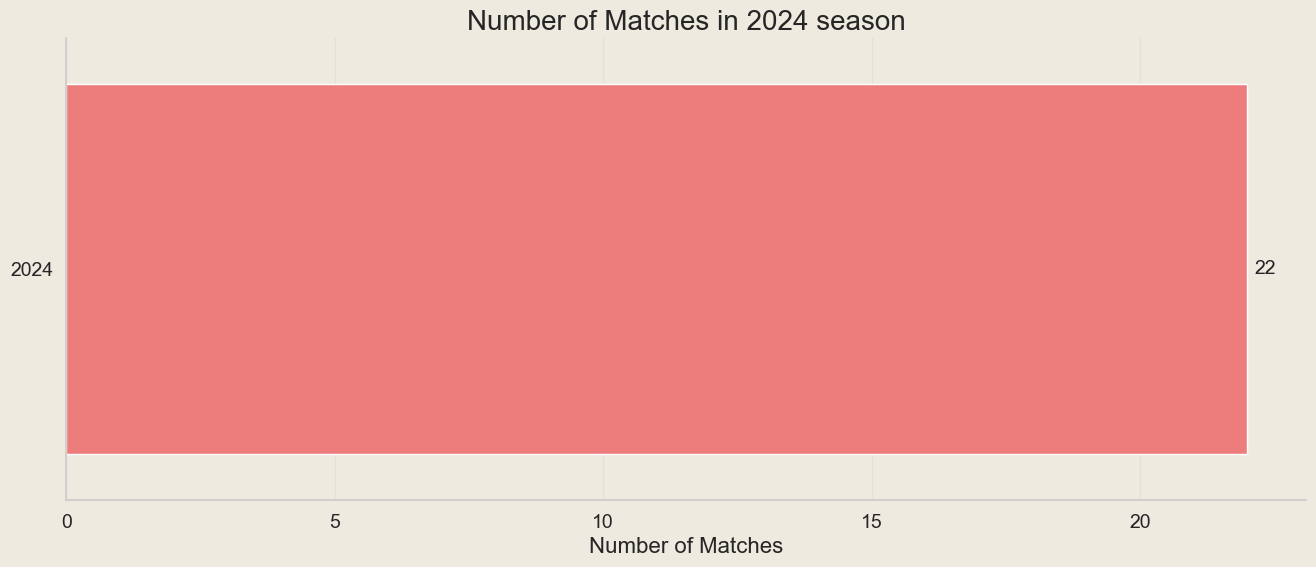

In [128]:
fig = plt.figure(figsize=(16, 6))

matches_per_season = deliveries_df.groupby('season')['match_id'].nunique()

ax = sns.barplot(y=matches_per_season.index, x=matches_per_season.values, palette = colors, orient= 'h')
ax.bar_label(ax.containers[0], fmt = '%d', label_type = 'edge', fontsize = 14, padding =5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Number of Matches', fontsize=16)
plt.ylabel(None)
plt.title('Number of Matches in 2024 season', fontsize=20)
plt.show()

#### Result Analysis:

In [110]:
# Basic Analysis of Matches and Results

# Toss Decision Analysis
batting_first = result_df[result_df['toss_decision'] == 'bat'].shape[0]
bowling_first = result_df[result_df['toss_decision'] == 'field'].shape[0]

print("Toss Decision Analysis:")
print(f"Matches where team decided to bat first: {batting_first} ({round(batting_first/result_df.shape[0]*100, 2)}%)")
print(f"Matches where team decided to bowl first: {bowling_first} ({round(bowling_first/result_df.shape[0]*100, 2)}%)")

# Match Outcome Analysis
matches_won_batting_first = result_df[~result_df['winner_runs'].isna()].shape[0]
matches_won_batting_second = result_df[~result_df['winner_wickets'].isna()].shape[0]

print(f"\nMatch Outcome Analysis:")
print(f"Matches won batting first: {matches_won_batting_first} ({round(matches_won_batting_first/result_df.shape[0]*100, 2)}%)")
print(f"Matches won batting second: {matches_won_batting_second} ({round(matches_won_batting_second/result_df.shape[0]*100, 2)}%)")

# Toss Impact on Match Results
toss_winner_won = result_df[result_df['toss_winner'] == result_df['winner']].shape[0]
toss_loser_won = result_df[result_df['toss_winner'] != result_df['winner']].shape[0]

print(f"\nToss Impact Analysis:")
print(f"Matches won by toss winner: {toss_winner_won} ({round(toss_winner_won/result_df.shape[0]*100, 2)}%)")
print(f"Matches won by toss loser: {toss_loser_won} ({round(toss_loser_won/result_df.shape[0]*100, 2)}%)")

# Innings-wise Performance
first_innings = deliveries_df[deliveries_df['innings'] == 1]
second_innings = deliveries_df[deliveries_df['innings'] == 2]

runs_scored_in_first_innings = first_innings['runs_off_bat'].sum() + first_innings['extras'].sum()
balls_faced_in_first_innings = first_innings.shape[0]
wickets_lost_in_first_innings = first_innings[~first_innings['player_dismissed'].isna()].shape[0]

runs_scored_in_second_innings = second_innings['runs_off_bat'].sum() + second_innings['extras'].sum()
balls_faced_in_second_innings = second_innings.shape[0]
wickets_lost_in_second_innings = second_innings[~second_innings['player_dismissed'].isna()].shape[0]

print(f"\nInnings Performance Analysis:")
print(f"First innings: {runs_scored_in_first_innings} runs for {wickets_lost_in_first_innings} wickets")
print(f"   Strike rate: {round(runs_scored_in_first_innings/balls_faced_in_first_innings * 100, 2)}")
print(f"   Average: {round(runs_scored_in_first_innings/wickets_lost_in_first_innings, 2)}")

print(f"Second innings: {runs_scored_in_second_innings} runs for {wickets_lost_in_second_innings} wickets") 
print(f"   Strike rate: {round(runs_scored_in_second_innings/balls_faced_in_second_innings * 100, 2)}")
print(f"   Average: {round(runs_scored_in_second_innings/wickets_lost_in_second_innings, 2)}")

Toss Decision Analysis:
Matches where team decided to bat first: 9 (40.91%)
Matches where team decided to bowl first: 13 (59.09%)

Match Outcome Analysis:
Matches won batting first: 11 (50.0%)
Matches won batting second: 11 (50.0%)

Toss Impact Analysis:
Matches won by toss winner: 14 (63.64%)
Matches won by toss loser: 8 (36.36%)

Innings Performance Analysis:
First innings: 3368 runs for 147 wickets
   Strike rate: 124.56
   Average: 22.91
Second innings: 3213 runs for 120 wickets
   Strike rate: 129.92
   Average: 26.78


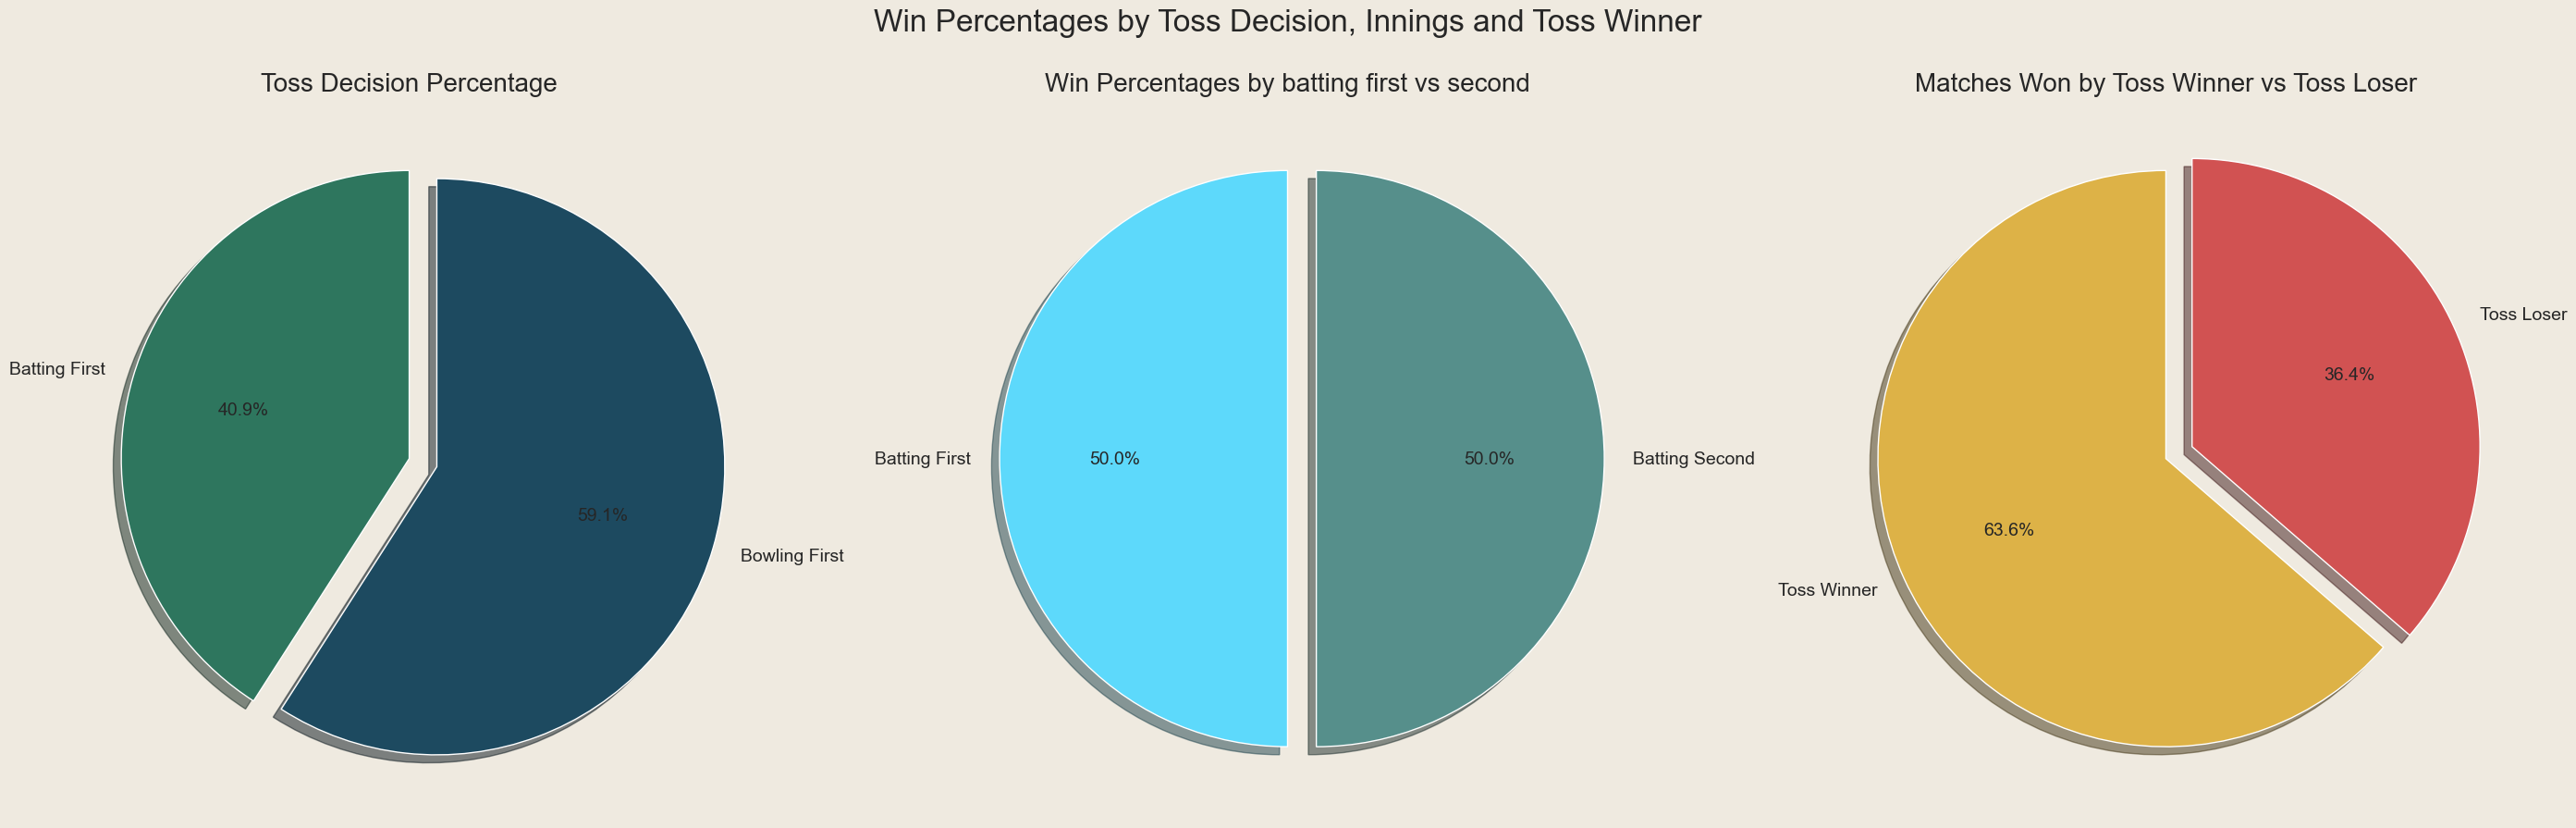

In [111]:
fig, ax = plt.subplots(figsize=(28, 10), ncols=3, nrows=1)

toss_decision_percentages = [
    round(batting_first/result_df.shape[0]*100, 2),
    round(bowling_first/result_df.shape[0]*100, 2)
]
explode =[0.0, 0.1]
ax[0].pie(toss_decision_percentages, labels=['Batting First', 'Bowling First'], autopct='%1.1f%%', colors=colors, shadow=True, textprops={'fontsize': 14}, startangle=90, explode=explode)
ax[0].set_title('Toss Decision Percentage', fontsize=20)

win_percentages_by_innings = [
    round(matches_won_batting_first/result_df.shape[0]*100, 2),
    round(matches_won_batting_second/result_df.shape[0]*100, 2)
]
explode =[0.0, 0.1]
ax[1].pie(win_percentages_by_innings, labels=['Batting First', 'Batting Second'], autopct='%1.1f%%', colors=colors[2:], shadow=True, textprops={'fontsize': 14}, startangle=90, explode=explode)
ax[1].set_title('Win Percentages by batting first vs second', fontsize=20)

win_percentages_by_toss_winner_and_losser = [
    round(toss_winner_won/result_df.shape[0]*100, 2),
    round(toss_loser_won/result_df.shape[0]*100, 2)
]
explode =[0.0, 0.1]
ax[2].pie(win_percentages_by_toss_winner_and_losser, labels=['Toss Winner', 'Toss Loser'], autopct='%1.1f%%', colors=colors[7:], shadow=True, textprops={'fontsize': 14}, startangle=90, explode=explode)
ax[2].set_title('Matches Won by Toss Winner vs Toss Loser', fontsize=20)

plt.suptitle("Win Percentages by Toss Decision, Innings and Toss Winner", fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.98)
plt.show()

C:\Users\shres\AppData\Local\Temp\ipykernel_19400\845086488.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['First Innings', 'Second Innings'], x=runs_scored, palette=colors[5:], ax=ax[0, 0])
C:\Users\shres\AppData\Local\Temp\ipykernel_19400\845086488.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['First Innings', 'Second Innings'], x=wickets_lost, palette=colors[5:], ax=ax[0, 1])
C:\Users\shres\AppData\Local\Temp\ipykernel_19400\845086488.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=['First Innings', 'Second Inning

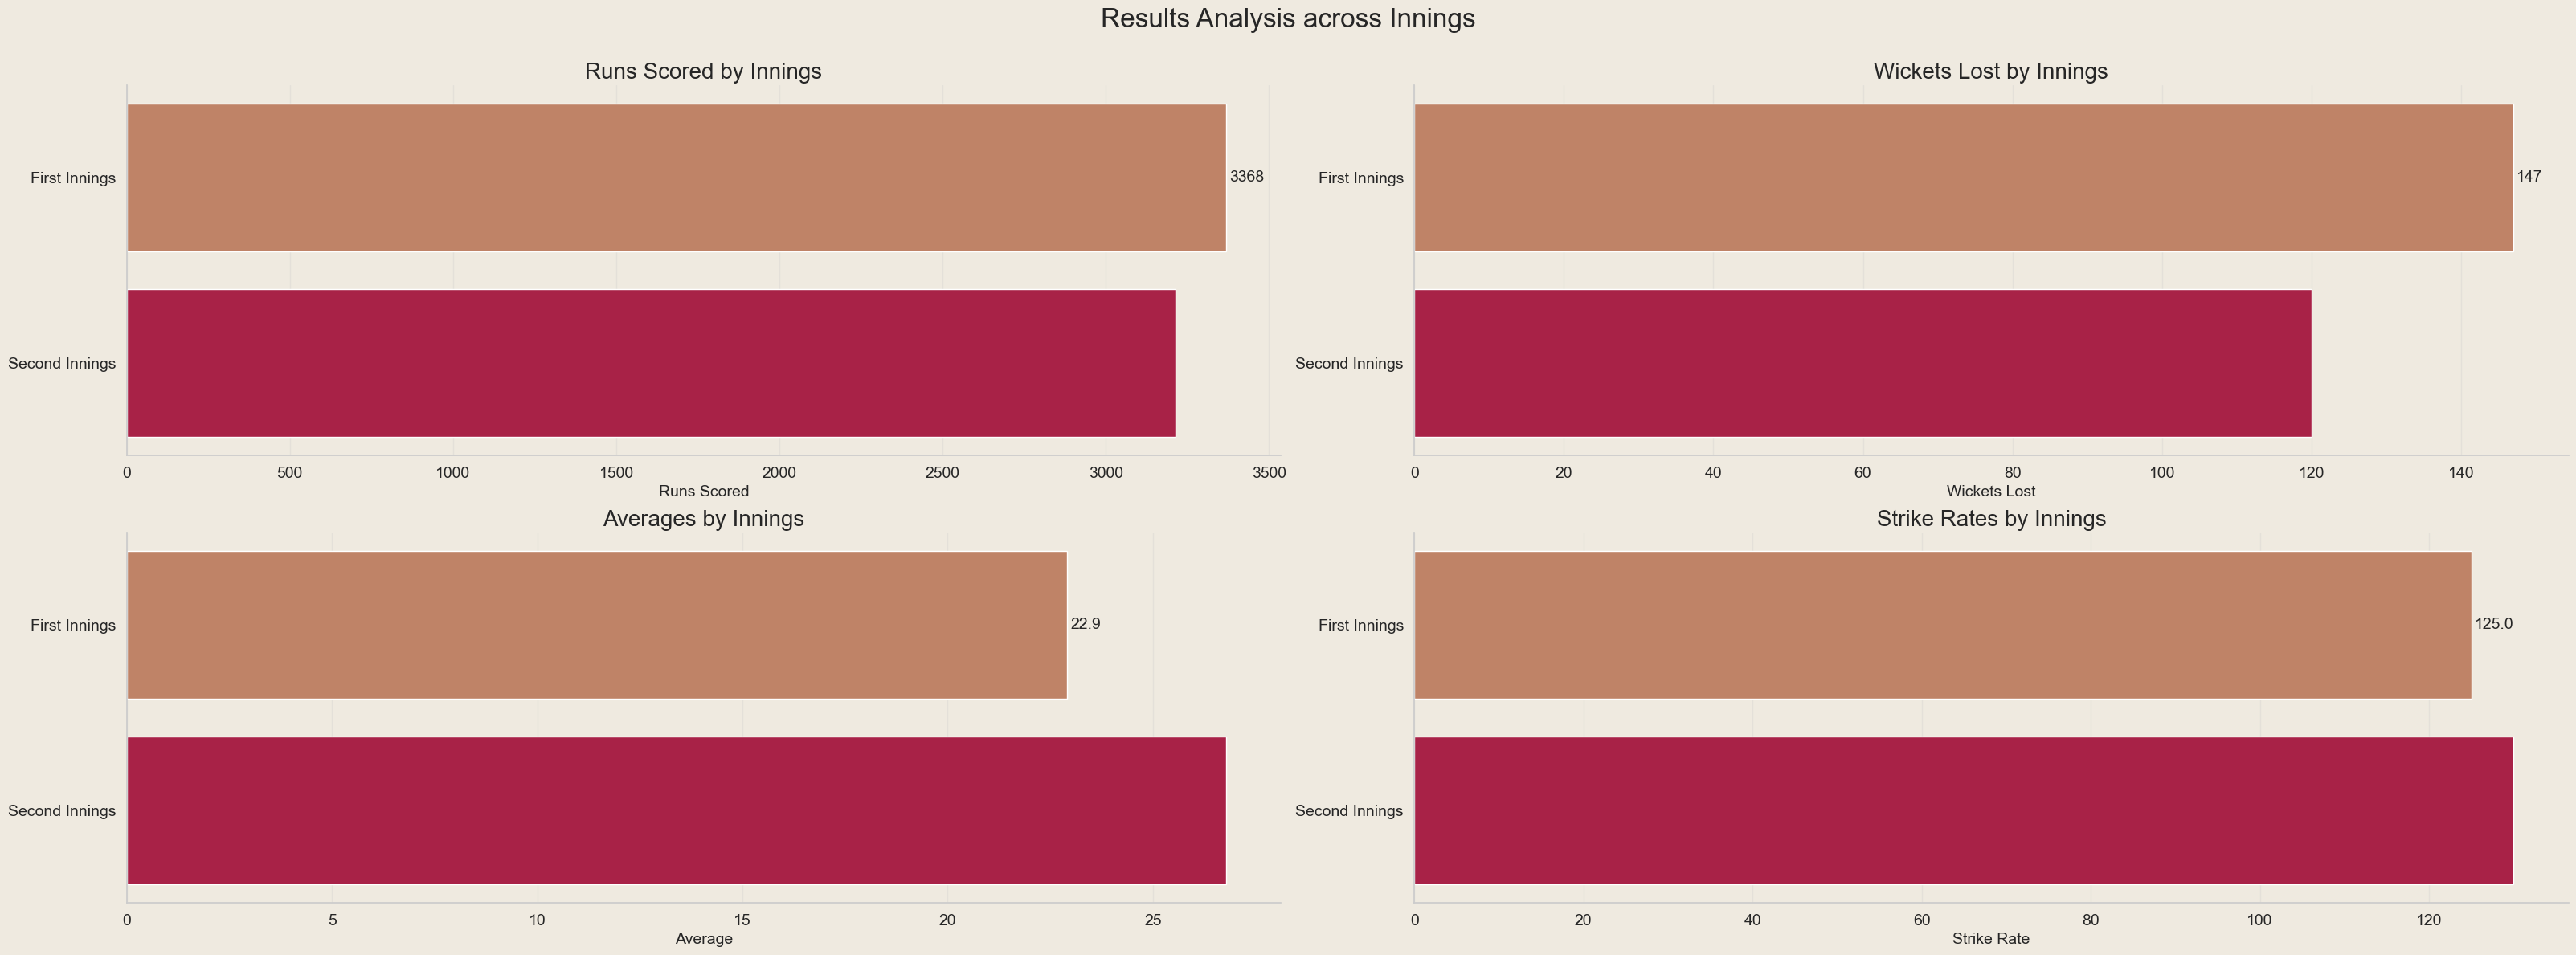

In [112]:
fig, ax = plt.subplots(figsize=(32, 12), ncols=2, nrows=2)

runs_scored = [runs_scored_in_first_innings, runs_scored_in_second_innings]
sns.barplot(y=['First Innings', 'Second Innings'], x=runs_scored, palette=colors[5:], ax=ax[0, 0])
ax[0, 0].set_title('Runs Scored by Innings', fontsize=20)
ax[0, 0].set_xlabel('Runs Scored', fontsize=14)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis='x', labelsize=14)
ax[0, 0].tick_params(axis='y', labelsize=14)
ax[0, 0].bar_label(ax[0, 0].containers[0], fmt='%d', fontsize=14, padding=3)

wickets_lost = [wickets_lost_in_first_innings, wickets_lost_in_second_innings]
sns.barplot(y=['First Innings', 'Second Innings'], x=wickets_lost, palette=colors[5:], ax=ax[0, 1])
ax[0, 1].set_title('Wickets Lost by Innings', fontsize=20)
ax[0, 1].set_xlabel('Wickets Lost', fontsize=14)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis='x', labelsize=14)
ax[0, 1].tick_params(axis='y', labelsize=14)
ax[0, 1].bar_label(ax[0, 1].containers[0], fmt='%d', fontsize=14, padding=3)

averages = [round(runs_scored_in_first_innings/wickets_lost_in_first_innings, 2), round(runs_scored_in_second_innings/wickets_lost_in_second_innings, 2)]
sns.barplot(y=['First Innings', 'Second Innings'], x=averages, palette=colors[5:], ax=ax[1, 0])
ax[1, 0].set_title('Averages by Innings', fontsize=20)
ax[1, 0].set_xlabel('Average', fontsize=14)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis='x', labelsize=14)
ax[1, 0].tick_params(axis='y', labelsize=14)
ax[1, 0].bar_label(ax[1, 0].containers[0], fmt='%1.1f', fontsize=14, padding=3)

strike_rates = [round(runs_scored_in_first_innings/balls_faced_in_first_innings, 2) * 100, round(runs_scored_in_second_innings/balls_faced_in_second_innings, 2) * 100]
sns.barplot(y=['First Innings', 'Second Innings'], x=strike_rates, palette=colors[5:], ax=ax[1, 1])
ax[1, 1].set_title('Strike Rates by Innings', fontsize=20)
ax[1, 1].set_xlabel('Strike Rate', fontsize=14)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(axis='x', labelsize=14)
ax[1, 1].tick_params(axis='y', labelsize=14)
ax[1, 1].bar_label(ax[1, 1].containers[0], fmt='%1.1f', fontsize=14, padding=3)

plt.suptitle('Results Analysis across Innings', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.90)
plt.show()

### By Venues

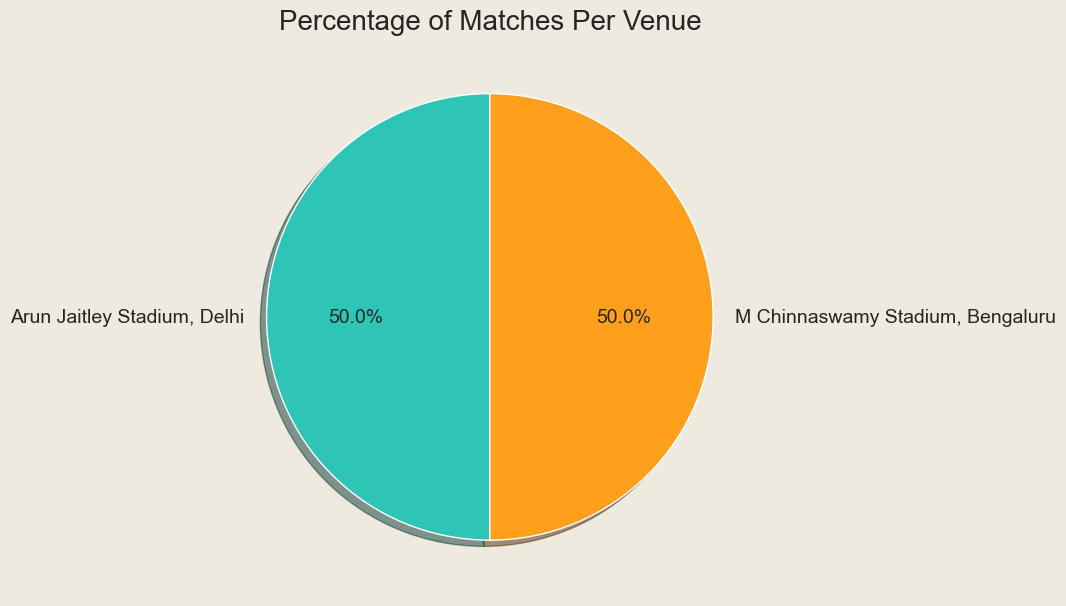

In [113]:
total_matches = deliveries_df['match_id'].nunique()

matches_per_venue = deliveries_df.groupby(['venue'])['match_id'].nunique().sort_values(ascending=False).reset_index()
matches_per_venue.rename(columns={'match_id': 'matches'}, inplace=True)
matches_per_venue['percentage'] = matches_per_venue['matches'].apply(lambda x: round((x/total_matches)*100, 2)).round(2)
matches_per_venue['percentage_label'] = matches_per_venue['percentage'].apply(lambda x: f'{x}%')

fig, ax = plt.subplots(figsize=(24, 6))

ax.pie(matches_per_venue['matches'], labels=matches_per_venue['venue'], autopct='%1.1f%%', colors=colors[15:], shadow=True, textprops={'fontsize': 14}, startangle=90)
plt.title('Percentage of Matches Per Venue', fontsize=20)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()


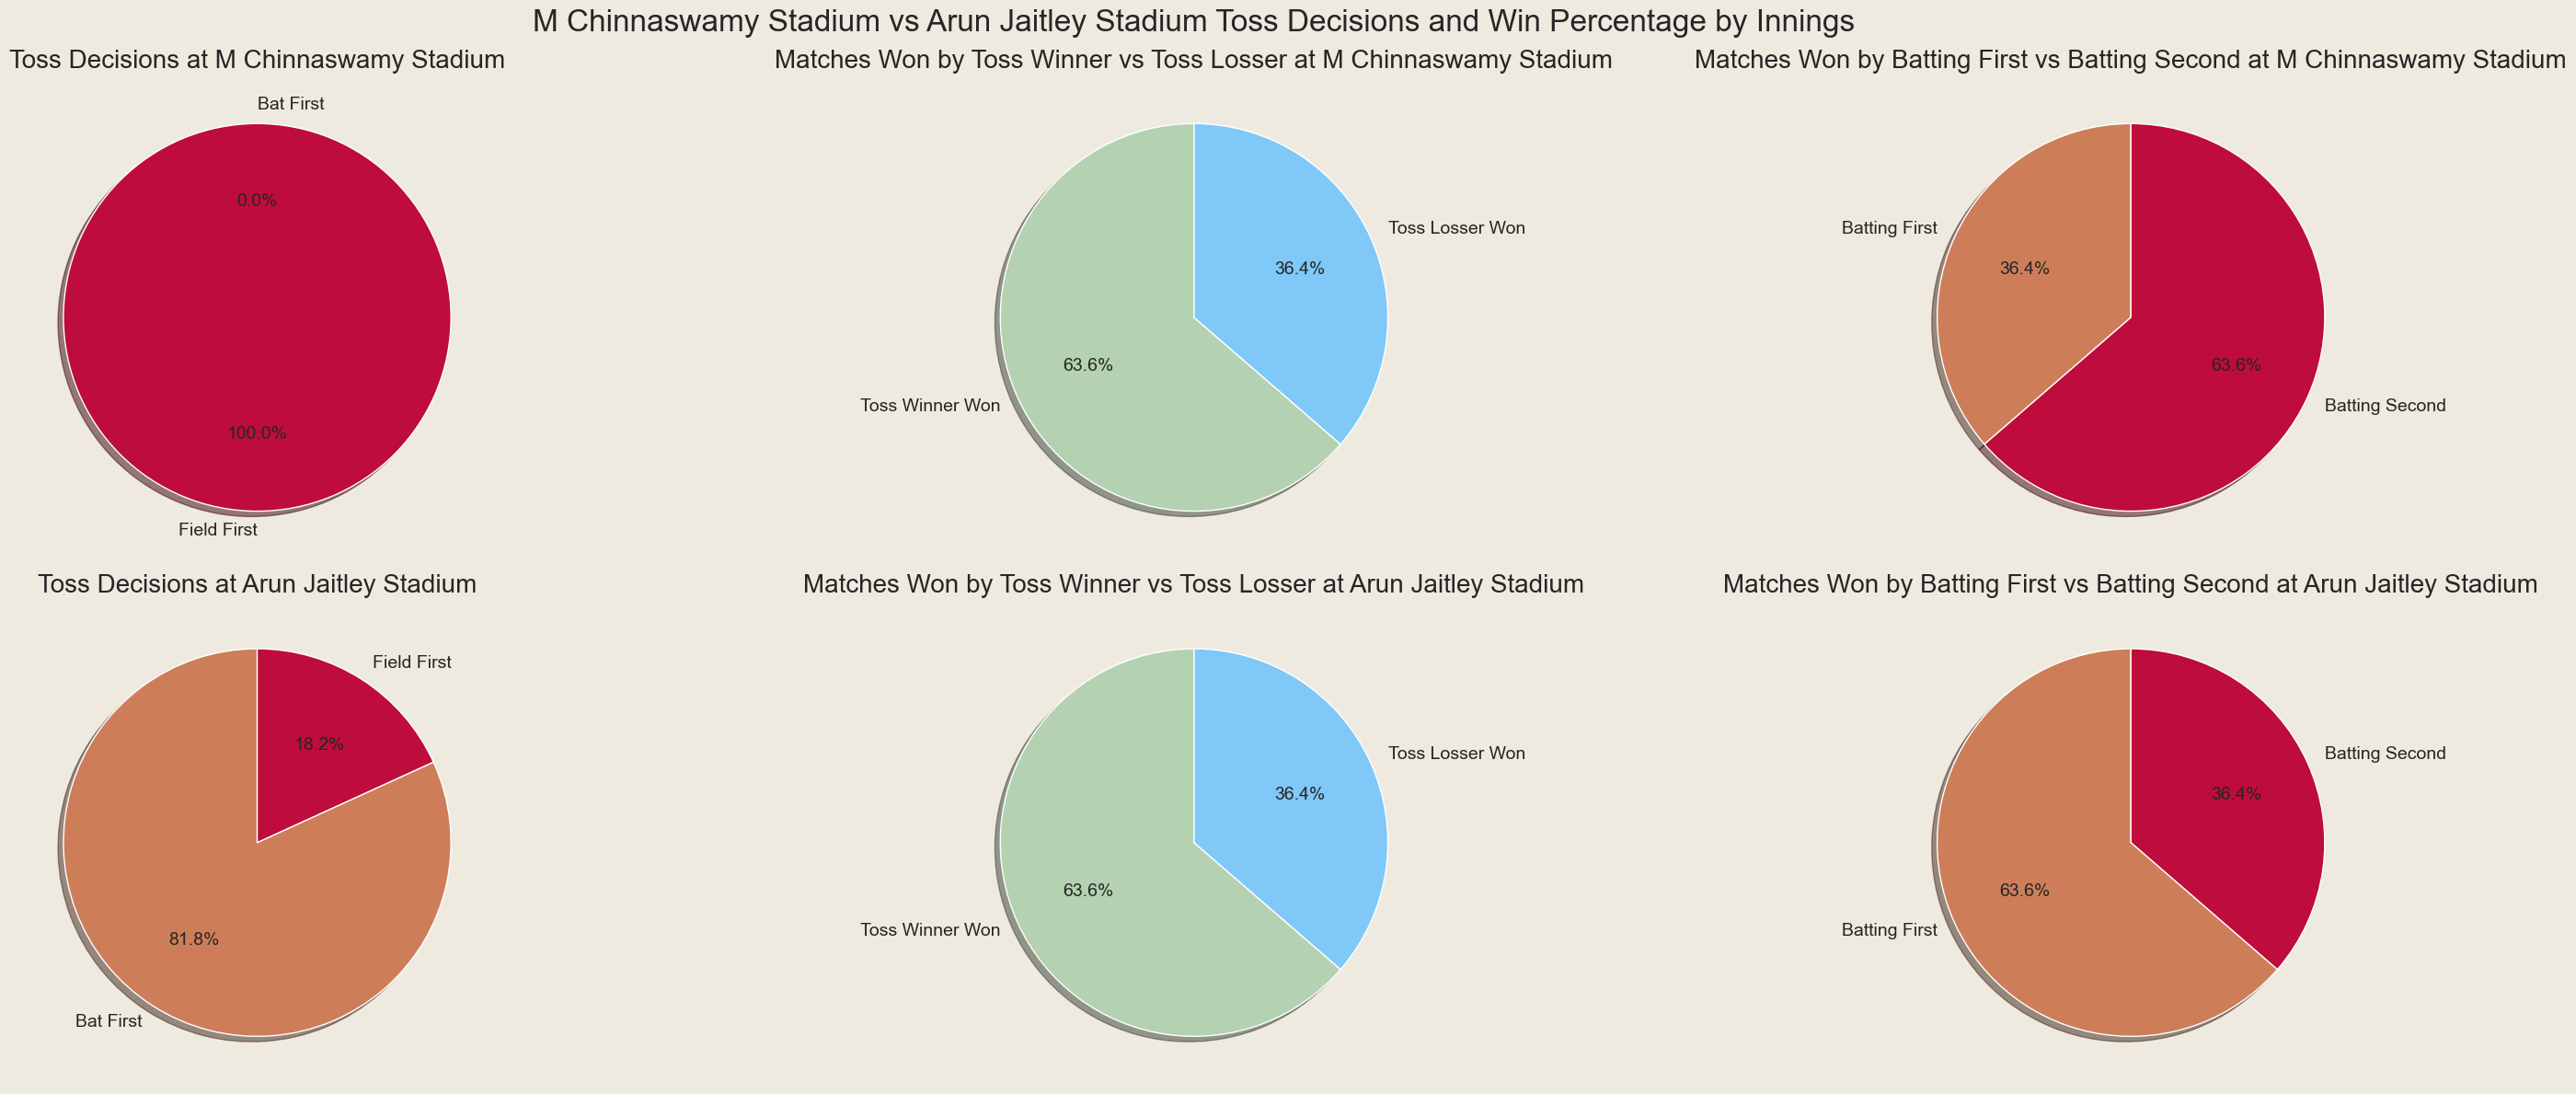

In [114]:
def venue_level_analysis(venue):
    venue_matches = result_df[result_df['venue'] == venue]
    scores_per_venue = deliveries_df[deliveries_df['venue'] == venue]
    
    # Check if venue has any matches - return None if no matches found
    if venue_matches.shape[0] == 0:
        return None
    
    total_runs_for_venue = scores_per_venue['runs_off_bat'].sum() + scores_per_venue['extras'].sum()
    total_deliveries_for_venue = scores_per_venue.shape[0]
    total_runs_first_innings = scores_per_venue[scores_per_venue['innings'] == 1]['runs_off_bat'].sum() + scores_per_venue[scores_per_venue['innings'] == 1]['extras'].sum()
    total_wickets_first_innings = scores_per_venue[(scores_per_venue['innings'] == 1) & (~scores_per_venue['player_dismissed'].isna())].shape[0]
    total_balls_first_innings = scores_per_venue[scores_per_venue['innings'] == 1].shape[0]
    total_runs_second_innings = scores_per_venue[scores_per_venue['innings'] == 2]['runs_off_bat'].sum() + scores_per_venue[scores_per_venue['innings'] == 2]['extras'].sum()
    total_wickets_second_innings = scores_per_venue[(scores_per_venue['innings'] == 2) & (~scores_per_venue['player_dismissed'].isna())].shape[0]
    total_balls_second_innings = scores_per_venue[scores_per_venue['innings'] == 2].shape[0]
    matches_won_batting_first = venue_matches[(venue_matches['winner_runs'] > 0)].shape[0]
    matches_won_batting_second = venue_matches[(venue_matches['winner_wickets'] > 0)].shape[0]
    toss_winner_chosen_to_bat = venue_matches[(venue_matches['toss_decision'] == 'bat')].shape[0]
    toss_winner_chosen_to_field = venue_matches[(venue_matches['toss_decision'] == 'field')].shape[0]
    toss_winner_won = venue_matches[(venue_matches['toss_winner'] == venue_matches['winner'])].shape[0]
    toss_loser_won = venue_matches[(venue_matches['toss_winner'] != venue_matches['winner'])].shape[0]
    total_runs = deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum()
    wickets = scores_per_venue[~scores_per_venue['player_dismissed'].isna()].shape[0]

    # Safe division with error handling
    num_matches = venue_matches.shape[0]
    
    stats = {
        'toss_decisions': [round(toss_winner_chosen_to_bat/num_matches*100, 2), round(toss_winner_chosen_to_field/num_matches*100, 2)],
        'matches_won_by_toss_winner': [round(toss_winner_won/num_matches*100, 2), round(toss_loser_won/num_matches*100, 2)],
        'win_percentage_by_innings': [round(matches_won_batting_first/num_matches*100, 2), round(matches_won_batting_second/num_matches*100, 2)],
        'total_runs_for_venue': total_runs_for_venue,
        'runs_per_match': round(total_runs_for_venue/num_matches, 2),
        'wickets_for_venue': wickets,
        'runs_scored_by_innings': [total_runs_first_innings, total_runs_second_innings],
        'wickets_by_innings': [total_wickets_first_innings, total_wickets_second_innings],
        "average_by_innings": [
            round(total_runs_first_innings/total_wickets_first_innings, 2) if total_wickets_first_innings > 0 else 0,
            round(total_runs_second_innings/total_wickets_second_innings, 2) if total_wickets_second_innings > 0 else 0
        ],
        'strike_rate_by_innings': [
            round(total_runs_first_innings/total_balls_first_innings, 2) * 100 if total_balls_first_innings > 0 else 0,
            round(total_runs_second_innings/total_balls_second_innings, 2) * 100 if total_balls_second_innings > 0 else 0
        ],
    }
    return stats

chinnaswamy_stats = venue_level_analysis('M Chinnaswamy Stadium')
arun_jaitley_stats = venue_level_analysis('Arun Jaitley Stadium')

fig, ax = plt.subplots(2, 3, figsize=(32, 12))

ax[0, 0].pie(chinnaswamy_stats['toss_decisions'], labels=['Bat First', 'Field First'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[0, 0].set_title('Toss Decisions at M Chinnaswamy Stadium', fontsize=20)

ax[1, 0].pie(arun_jaitley_stats['toss_decisions'], labels=['Bat First', 'Field First'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[1, 0].set_title('Toss Decisions at Arun Jaitley Stadium', fontsize=20)

ax[0, 1].pie(chinnaswamy_stats['matches_won_by_toss_winner'], labels=['Toss Winner Won', 'Toss Losser Won'], autopct='%1.1f%%', colors=colors[9:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[0, 1].set_title('Matches Won by Toss Winner vs Toss Losser at M Chinnaswamy Stadium', fontsize=20)

ax[1, 1].pie(arun_jaitley_stats['matches_won_by_toss_winner'], labels=['Toss Winner Won', 'Toss Losser Won'], autopct='%1.1f%%', colors=colors[9:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[1, 1].set_title('Matches Won by Toss Winner vs Toss Losser at Arun Jaitley Stadium', fontsize=20)

ax[0, 2].pie(chinnaswamy_stats['win_percentage_by_innings'], labels=['Batting First', 'Batting Second'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[0, 2].set_title('Matches Won by Batting First vs Batting Second at M Chinnaswamy Stadium', fontsize=20)

ax[1, 2].pie(arun_jaitley_stats['win_percentage_by_innings'], labels=['Batting First', 'Batting Second'], autopct='%1.1f%%', colors=colors[5:], shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[1, 2].set_title('Matches Won by Batting First vs Batting Second at Arun Jaitley Stadium', fontsize=20)


plt.suptitle('M Chinnaswamy Stadium vs Arun Jaitley Stadium Toss Decisions and Win Percentage by Innings', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.92)
plt.show()

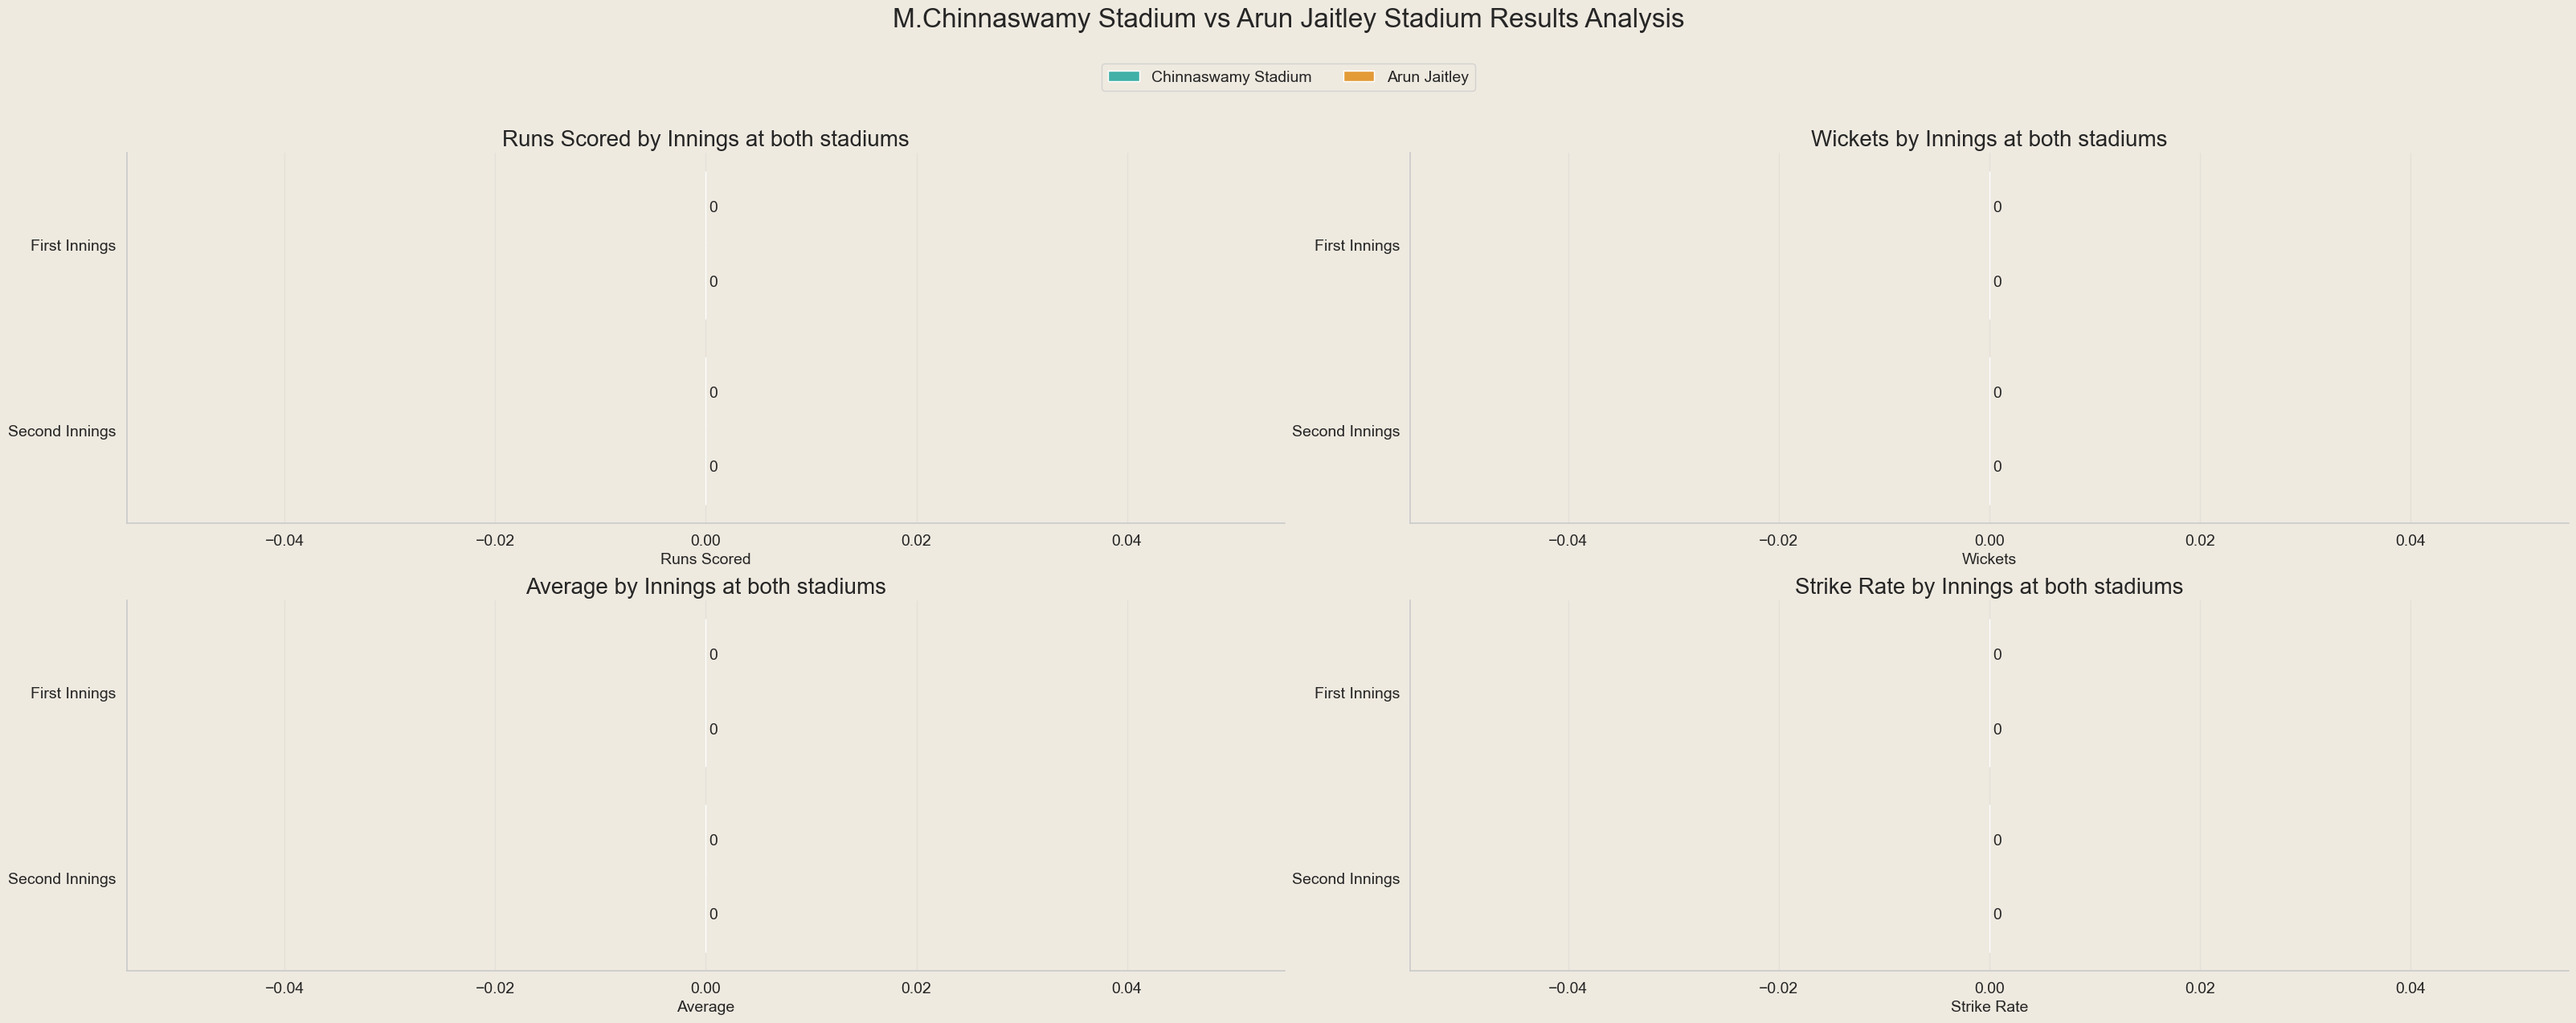

In [115]:
fig, ax = plt.subplots(2, 2, figsize=(32, 12))

data = [
    {'innings': 'First Innings', 'runs_scored': chinnaswamy_stats['runs_scored_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'runs_scored': chinnaswamy_stats['runs_scored_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'runs_scored': arun_jaitley_stats['runs_scored_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'runs_scored': arun_jaitley_stats['runs_scored_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
runs_scored_df = pd.DataFrame(data)
sns.barplot(
    x=runs_scored_df['runs_scored'], y=runs_scored_df['innings'], hue=runs_scored_df['stadium'], palette=colors[15:], ax=ax[0, 0]
)
ax[0, 0].set_title('Runs Scored by Innings at both stadiums', fontsize=20)
ax[0, 0].set_xlabel('Runs Scored', fontsize=14)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis='x', labelsize=14)
ax[0, 0].tick_params(axis='y', labelsize=14)
ax[0, 0].bar_label(ax[0, 0].containers[0], fontsize=14, padding=3)
ax[0, 0].bar_label(ax[0, 0].containers[1], fontsize=14, padding=3)

data = [
    {'innings': 'First Innings', 'wickets': chinnaswamy_stats['wickets_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'wickets': chinnaswamy_stats['wickets_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'wickets': arun_jaitley_stats['wickets_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'wickets': arun_jaitley_stats['wickets_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
wickets_df = pd.DataFrame(data)
sns.barplot(
    x=wickets_df['wickets'], y=wickets_df['innings'], hue=wickets_df['stadium'], palette=colors[15:], ax=ax[0, 1]
)
ax[0, 1].set_title('Wickets by Innings at both stadiums', fontsize=20)
ax[0, 1].set_xlabel('Wickets', fontsize=14)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis='x', labelsize=14)
ax[0, 1].tick_params(axis='y', labelsize=14)
ax[0, 1].bar_label(ax[0, 1].containers[0], fontsize=14, padding=3)
ax[0, 1].bar_label(ax[0, 1].containers[1], fontsize=14, padding=3)

data = [
    {'innings': 'First Innings', 'average': chinnaswamy_stats['average_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'average': chinnaswamy_stats['average_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'average': arun_jaitley_stats['average_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'average': arun_jaitley_stats['average_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
average_df = pd.DataFrame(data)
sns.barplot(
    x=average_df['average'], y=average_df['innings'], hue=average_df['stadium'], palette=colors[15:], ax=ax[1, 0]
)
ax[1, 0].set_title('Average by Innings at both stadiums', fontsize=20)
ax[1, 0].set_xlabel('Average', fontsize=14)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis='x', labelsize=14)
ax[1, 0].tick_params(axis='y', labelsize=14)
ax[1, 0].bar_label(ax[1, 0].containers[0], fontsize=14, padding=3)
ax[1, 0].bar_label(ax[1, 0].containers[1], fontsize=14, padding=3)

data = [
    {'innings': 'First Innings', 'strike_rate': chinnaswamy_stats['strike_rate_by_innings'][0], 'stadium': 'Chinnaswamy Stadium'},
    {'innings': 'Second Innings', 'strike_rate': chinnaswamy_stats['strike_rate_by_innings'][1], 'stadium': 'Chinnaswamy Stadium'},    
    {'innings': 'First Innings', 'strike_rate': arun_jaitley_stats['strike_rate_by_innings'][0], 'stadium': 'Arun Jaitley'},
    {'innings': 'Second Innings', 'strike_rate': arun_jaitley_stats['strike_rate_by_innings'][1], 'stadium': 'Arun Jaitley'}
]
strike_rate_df = pd.DataFrame(data)
sns.barplot(
    x=strike_rate_df['strike_rate'], y=strike_rate_df['innings'], hue=strike_rate_df['stadium'], palette=colors[15:], ax=ax[1, 1]
)
ax[1, 1].set_title('Strike Rate by Innings at both stadiums', fontsize=20)
ax[1, 1].set_xlabel('Strike Rate', fontsize=14)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(axis='x', labelsize=14)
ax[1, 1].tick_params(axis='y', labelsize=14)
ax[1, 1].bar_label(ax[1, 1].containers[0], fontsize=14, padding=3)
ax[1, 1].bar_label(ax[1, 1].containers[1], fontsize=14, padding=3)

handles, labels = [], []
for plot_ax in [ax[0, 0], ax[0, 1], ax[1, 0],  ax[1, 1]]:
        handles += plot_ax.get_legend_handles_labels()[0]
        labels += plot_ax.get_legend_handles_labels()[1]
        plot_ax.legend().remove()
fig.legend(
    handles[:2], labels[:2], loc='upper center', bbox_to_anchor=(.5, 1), ncol=5, fontsize=14
)

plt.suptitle('M.Chinnaswamy Stadium vs Arun Jaitley Stadium Results Analysis', fontsize=24, y=1.05)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.90)
plt.show()

## Team-wise Performance Analysis

In [116]:
# Team Performance Analysis
teams = list(set(result_df['team1'].unique()).union(set(result_df['team2'].unique())))

team_stats = []
for team in teams:
    # Matches played
    matches_played = result_df[(result_df['team1'] == team) | (result_df['team2'] == team)].shape[0]
    
    # Matches won
    matches_won = result_df[result_df['winner'] == team].shape[0]
    
    # Win percentage
    win_percentage = round((matches_won / matches_played) * 100, 2) if matches_played > 0 else 0
    
    # Toss wins
    toss_wins = result_df[result_df['toss_winner'] == team].shape[0]
    
    # Player of the match awards
    pom_awards = result_df[result_df['player_of_match'].str.contains(team, na=False)].shape[0]
    
    # Batting statistics
    batting_stats = deliveries_df[deliveries_df['batting_team'] == team]
    total_runs = batting_stats['runs_off_bat'].sum() + batting_stats['extras'].sum()
    total_balls = batting_stats.shape[0]
    total_wickets = batting_stats[~batting_stats['player_dismissed'].isna()].shape[0]
    
    batting_avg = round(total_runs / total_wickets, 2) if total_wickets > 0 else 0
    batting_sr = round((total_runs / total_balls) * 100, 2) if total_balls > 0 else 0
    
    # Bowling statistics
    bowling_stats = deliveries_df[deliveries_df['bowling_team'] == team]
    runs_conceded = bowling_stats['runs_off_bat'].sum() + bowling_stats['extras'].sum()
    balls_bowled = bowling_stats.shape[0]
    wickets_taken = bowling_stats[~bowling_stats['player_dismissed'].isna()].shape[0]
    
    bowling_avg = round(runs_conceded / wickets_taken, 2) if wickets_taken > 0 else 0
    economy_rate = round((runs_conceded / balls_bowled) * 6, 2) if balls_bowled > 0 else 0
    
    team_stats.append({
        'Team': team,
        'Matches_Played': matches_played,
        'Matches_Won': matches_won,
        'Win_Percentage': win_percentage,
        'Toss_Wins': toss_wins,
        'POM_Awards': pom_awards,
        'Total_Runs_Scored': total_runs,
        'Batting_Average': batting_avg,
        'Batting_Strike_Rate': batting_sr,
        'Runs_Conceded': runs_conceded,
        'Wickets_Taken': wickets_taken,
        'Bowling_Average': bowling_avg,
        'Economy_Rate': economy_rate
    })

team_df = pd.DataFrame(team_stats).sort_values('Win_Percentage', ascending=False)
display(team_df)

,Team,Matches_Played,Matches_Won,Win_Percentage,Toss_Wins,POM_Awards,Total_Runs_Scored,Batting_Average,Batting_Strike_Rate,Runs_Conceded,Wickets_Taken,Bowling_Average,Economy_Rate
3,Delhi Capitals,9,6,66.67,3,0,1403,27.51,135.95,1321,66,20.02,7.09
4,Royal Challengers Bangalore,10,6,60.00,4,0,1490,28.65,129.68,1500,66,22.73,7.47
0,Mumbai Indians,9,5,55.56,5,0,1353,25.53,128.25,1341,52,25.79,7.58
2,UP Warriorz,8,3,37.50,5,0,1155,21.79,121.58,1230,45,27.33,7.85
1,Gujarat Giants,8,2,25.00,5,0,1180,20.34,119.07,1189,38,31.29,8.36


C:\Users\shres\AppData\Local\Temp\ipykernel_19400\1379260529.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_df, x='Win_Percentage', y='Team', palette=colors, ax=ax[0, 0])
C:\Users\shres\AppData\Local\Temp\ipykernel_19400\1379260529.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_df, x='Batting_Strike_Rate', y='Team', palette=colors[5:], ax=ax[0, 1])
C:\Users\shres\AppData\Local\Temp\ipykernel_19400\1379260529.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=team_df_sorted_economy, x='Economy_Rate', y='T

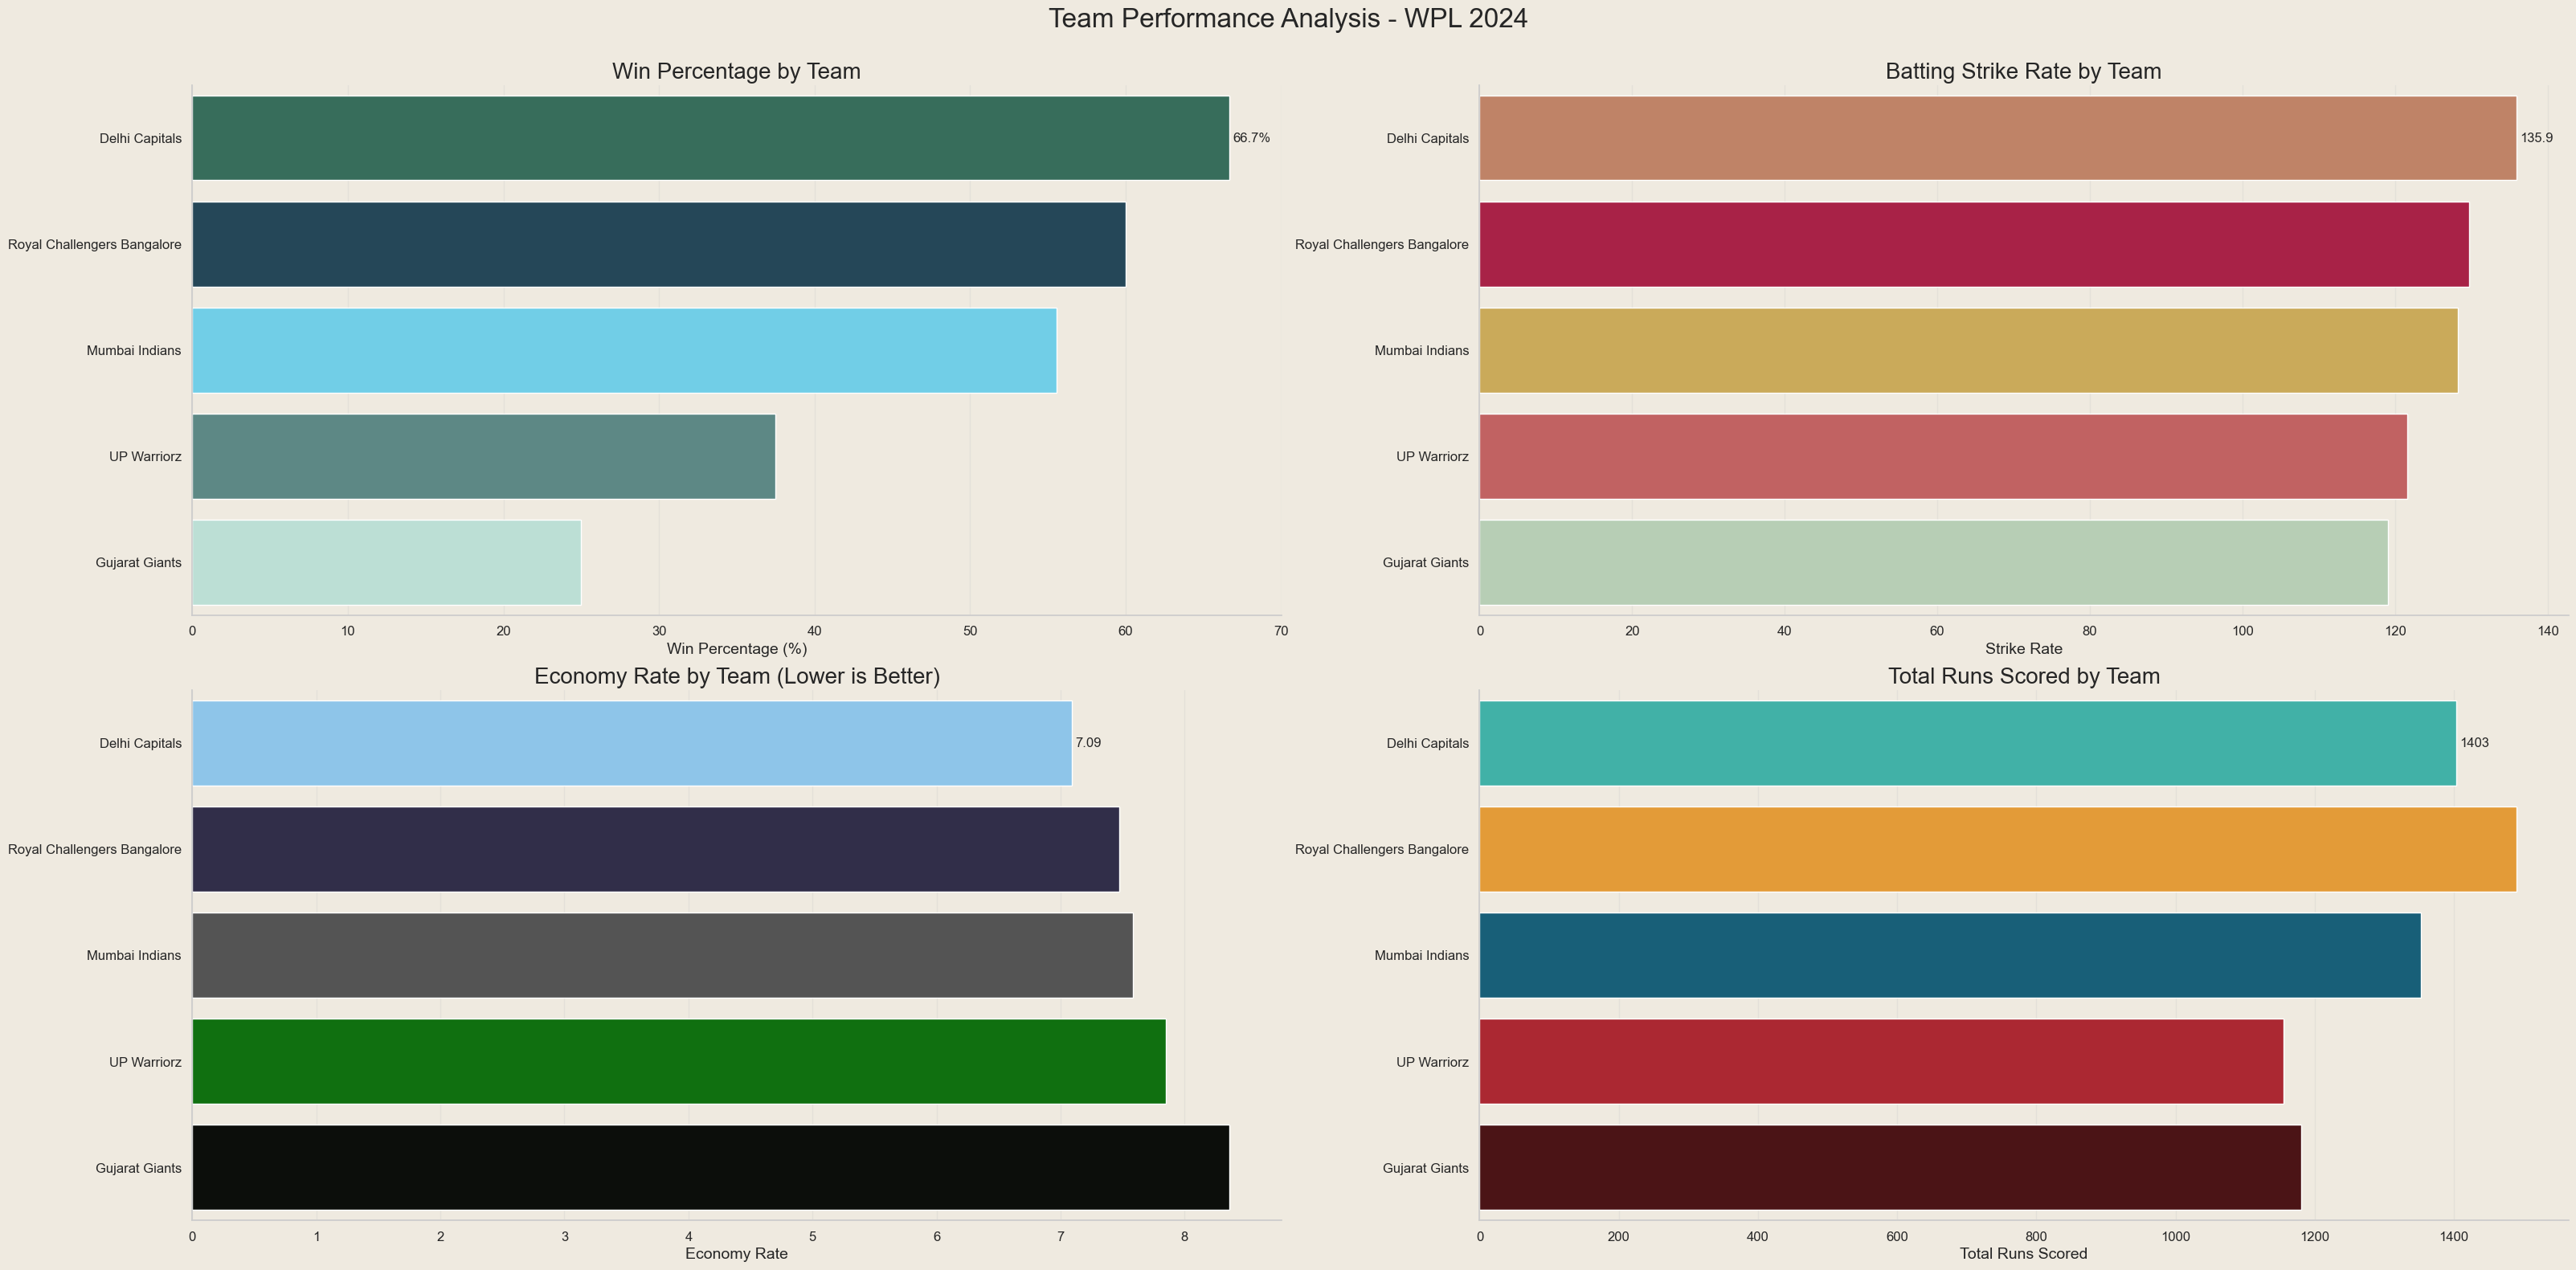

In [117]:
# Team Performance Visualizations
fig, ax = plt.subplots(2, 2, figsize=(32, 16))

# Win Percentage by Team
sns.barplot(data=team_df, x='Win_Percentage', y='Team', palette=colors, ax=ax[0, 0])
ax[0, 0].set_title('Win Percentage by Team', fontsize=20)
ax[0, 0].set_xlabel('Win Percentage (%)', fontsize=14)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis='both', labelsize=12)
ax[0, 0].bar_label(ax[0, 0].containers[0], fmt='%.1f%%', fontsize=12, padding=3)

# Batting Strike Rate by Team
sns.barplot(data=team_df, x='Batting_Strike_Rate', y='Team', palette=colors[5:], ax=ax[0, 1])
ax[0, 1].set_title('Batting Strike Rate by Team', fontsize=20)
ax[0, 1].set_xlabel('Strike Rate', fontsize=14)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis='both', labelsize=12)
ax[0, 1].bar_label(ax[0, 1].containers[0], fmt='%.1f', fontsize=12, padding=3)

# Economy Rate by Team (Lower is better)
team_df_sorted_economy = team_df.sort_values('Economy_Rate', ascending=True)
sns.barplot(data=team_df_sorted_economy, x='Economy_Rate', y='Team', palette=colors[10:], ax=ax[1, 0])
ax[1, 0].set_title('Economy Rate by Team (Lower is Better)', fontsize=20)
ax[1, 0].set_xlabel('Economy Rate', fontsize=14)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis='both', labelsize=12)
ax[1, 0].bar_label(ax[1, 0].containers[0], fmt='%.2f', fontsize=12, padding=3)

# Total Runs Scored by Team
sns.barplot(data=team_df, x='Total_Runs_Scored', y='Team', palette=colors[15:], ax=ax[1, 1])
ax[1, 1].set_title('Total Runs Scored by Team', fontsize=20)
ax[1, 1].set_xlabel('Total Runs Scored', fontsize=14)
ax[1, 1].set_ylabel(None)
ax[1, 1].tick_params(axis='both', labelsize=12)
ax[1, 1].bar_label(ax[1, 1].containers[0], fmt='%d', fontsize=12, padding=3)

plt.suptitle('Team Performance Analysis - WPL 2024', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.92)
plt.show()

## Player Performance Analysis

In [118]:
# Top 10 Batters Analysis
batting_stats = []
all_batters = deliveries_df['striker'].unique()

for batter in all_batters:
    batter_deliveries = deliveries_df[deliveries_df['striker'] == batter]
    
    runs_scored = batter_deliveries['runs_off_bat'].sum()
    balls_faced = batter_deliveries.shape[0]
    times_dismissed = batter_deliveries[~batter_deliveries['player_dismissed'].isna()].shape[0]
    
    # Count boundaries
    fours = batter_deliveries[batter_deliveries['runs_off_bat'] == 4].shape[0]
    sixes = batter_deliveries[batter_deliveries['runs_off_bat'] == 6].shape[0]
    
    # Calculate stats only if batsman has faced at least 20 balls
    if balls_faced >= 20:
        strike_rate = round((runs_scored / balls_faced) * 100, 2) if balls_faced > 0 else 0
        batting_avg = round(runs_scored / times_dismissed, 2) if times_dismissed > 0 else runs_scored
        
        batting_stats.append({
            'Player': batter,
            'Runs': runs_scored,
            'Balls_Faced': balls_faced,
            'Strike_Rate': strike_rate,
            'Average': batting_avg,
            'Fours': fours,
            'Sixes': sixes,
            'Total_Boundaries': fours + sixes,
            'Times_Dismissed': times_dismissed
        })

batting_df = pd.DataFrame(batting_stats).sort_values('Runs', ascending=False)
print("Top 10 Run Scorers in WPL 2024:")
display(batting_df.head(10))

print("\nTop 10 by Strike Rate (min 50 balls):")
top_sr_df = batting_df[batting_df['Balls_Faced'] >= 50].sort_values('Strike_Rate', ascending=False)
display(top_sr_df.head(10)[['Player', 'Runs', 'Strike_Rate', 'Average', 'Fours', 'Sixes']])

Top 10 Run Scorers in WPL 2024:


,Player,Runs,Balls_Faced,Strike_Rate,Average,Fours,Sixes,Total_Boundaries,Times_Dismissed
17,EA Perry,347,283,122.61,86.75,41,7,48,4
0,MM Lanning,331,279,118.64,36.78,47,4,51,9
1,Shafali Verma,309,211,146.45,38.62,27,20,47,8
15,S Mandhana,300,228,131.58,30.00,40,10,50,10
28,DB Sharma,295,221,133.48,98.33,34,8,42,3
30,BL Mooney,285,208,137.02,28.50,38,5,43,10
9,H Kaur,268,195,137.44,44.67,30,8,38,6
18,RM Ghosh,257,186,138.17,36.71,31,10,41,7
3,JI Rodrigues,235,156,150.64,39.17,26,8,34,6
2,A Capsey,230,185,124.32,28.75,30,6,36,8



Top 10 by Strike Rate (min 50 balls):


,Player,Runs,Strike_Rate,Average,Fours,Sixes
19,G Wareham,111,163.24,22.20,12,3
13,S Sajana,87,155.36,21.75,13,3
3,JI Rodrigues,235,150.64,39.17,26,8
1,Shafali Verma,309,146.45,38.62,27,20
18,RM Ghosh,257,138.17,36.71,31,10
9,H Kaur,268,137.44,44.67,30,8
30,BL Mooney,285,137.02,28.50,38,5
24,GM Harris,188,134.29,31.33,23,7
26,KP Navgire,110,134.15,13.75,11,7
28,DB Sharma,295,133.48,98.33,34,8


In [119]:
# Top 10 Bowlers Analysis
bowling_stats = []
all_bowlers = deliveries_df['bowler'].unique()

for bowler in all_bowlers:
    bowler_deliveries = deliveries_df[deliveries_df['bowler'] == bowler]
    
    runs_conceded = bowler_deliveries['runs_off_bat'].sum() + bowler_deliveries['extras'].sum()
    balls_bowled = bowler_deliveries.shape[0]
    wickets_taken = bowler_deliveries[~bowler_deliveries['player_dismissed'].isna()].shape[0]
    
    # Calculate stats only if bowler has bowled at least 30 balls
    if balls_bowled >= 30:
        economy_rate = round((runs_conceded / balls_bowled) * 6, 2) if balls_bowled > 0 else 0
        bowling_average = round(runs_conceded / wickets_taken, 2) if wickets_taken > 0 else float('inf')
        strike_rate = round(balls_bowled / wickets_taken, 2) if wickets_taken > 0 else float('inf')
        
        # Count dot balls
        dot_balls = bowler_deliveries[bowler_deliveries['total_runs'] == 0].shape[0]
        dot_ball_percentage = round((dot_balls / balls_bowled) * 100, 2) if balls_bowled > 0 else 0
        
        bowling_stats.append({
            'Player': bowler,
            'Wickets': wickets_taken,
            'Runs_Conceded': runs_conceded,
            'Balls_Bowled': balls_bowled,
            'Economy_Rate': economy_rate,
            'Bowling_Average': bowling_average,
            'Bowling_Strike_Rate': strike_rate,
            'Dot_Ball_Percentage': dot_ball_percentage
        })

bowling_df = pd.DataFrame(bowling_stats).sort_values('Wickets', ascending=False)
print("Top 10 Wicket Takers in WPL 2024:")
display(bowling_df.head(10))

print("\nTop 10 by Economy Rate (min 60 balls):")
top_econ_df = bowling_df[bowling_df['Balls_Bowled'] >= 60].sort_values('Economy_Rate', ascending=True)
display(top_econ_df.head(10)[['Player', 'Wickets', 'Economy_Rate', 'Bowling_Average', 'Dot_Ball_Percentage']])

Top 10 Wicket Takers in WPL 2024:


,Player,Wickets,Runs_Conceded,Balls_Bowled,Economy_Rate,Bowling_Average,Bowling_Strike_Rate,Dot_Ball_Percentage
20,S Molineux,15,279,232,7.22,18.60,15.47,39.22
36,JL Jonassen,15,186,160,6.98,12.40,10.67,36.25
15,S Ecclestone,15,208,192,6.50,13.87,12.80,45.31
22,S Asha,13,185,159,6.98,14.23,12.23,40.25
21,SR Patil,13,157,131,7.19,12.08,10.08,38.17
29,TP Kanwar,11,215,176,7.33,19.55,16.00,40.34
7,M Kapp,11,178,171,6.25,16.18,15.55,48.54
12,RP Yadav,11,188,152,7.42,17.09,13.82,38.16
16,DB Sharma,10,223,180,7.43,22.30,18.00,31.11
2,NR Sciver-Brunt,10,221,175,7.58,22.10,17.50,40.00



Top 10 by Economy Rate (min 60 balls):


,Player,Wickets,Economy_Rate,Bowling_Average,Dot_Ball_Percentage
0,S Ismail,8,6.10,22.25,54.29
7,M Kapp,11,6.25,16.18,48.54
15,S Ecclestone,15,6.50,13.87,45.31
24,EA Perry,7,6.67,15.71,46.46
13,GM Harris,5,6.77,24.60,44.95
36,JL Jonassen,15,6.98,12.40,36.25
22,S Asha,13,6.98,14.23,40.25
8,S Pandey,9,6.99,27.56,39.44
40,SM Shakil,4,7.07,21.50,49.32
10,A Reddy,9,7.17,25.22,32.63


C:\Users\shres\AppData\Local\Temp\ipykernel_19400\1090216227.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_batters, x='Runs', y='Player', palette=colors, ax=ax[0, 0])
C:\Users\shres\AppData\Local\Temp\ipykernel_19400\1090216227.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_bowlers, x='Wickets', y='Player', palette=colors[5:], ax=ax[0, 1])


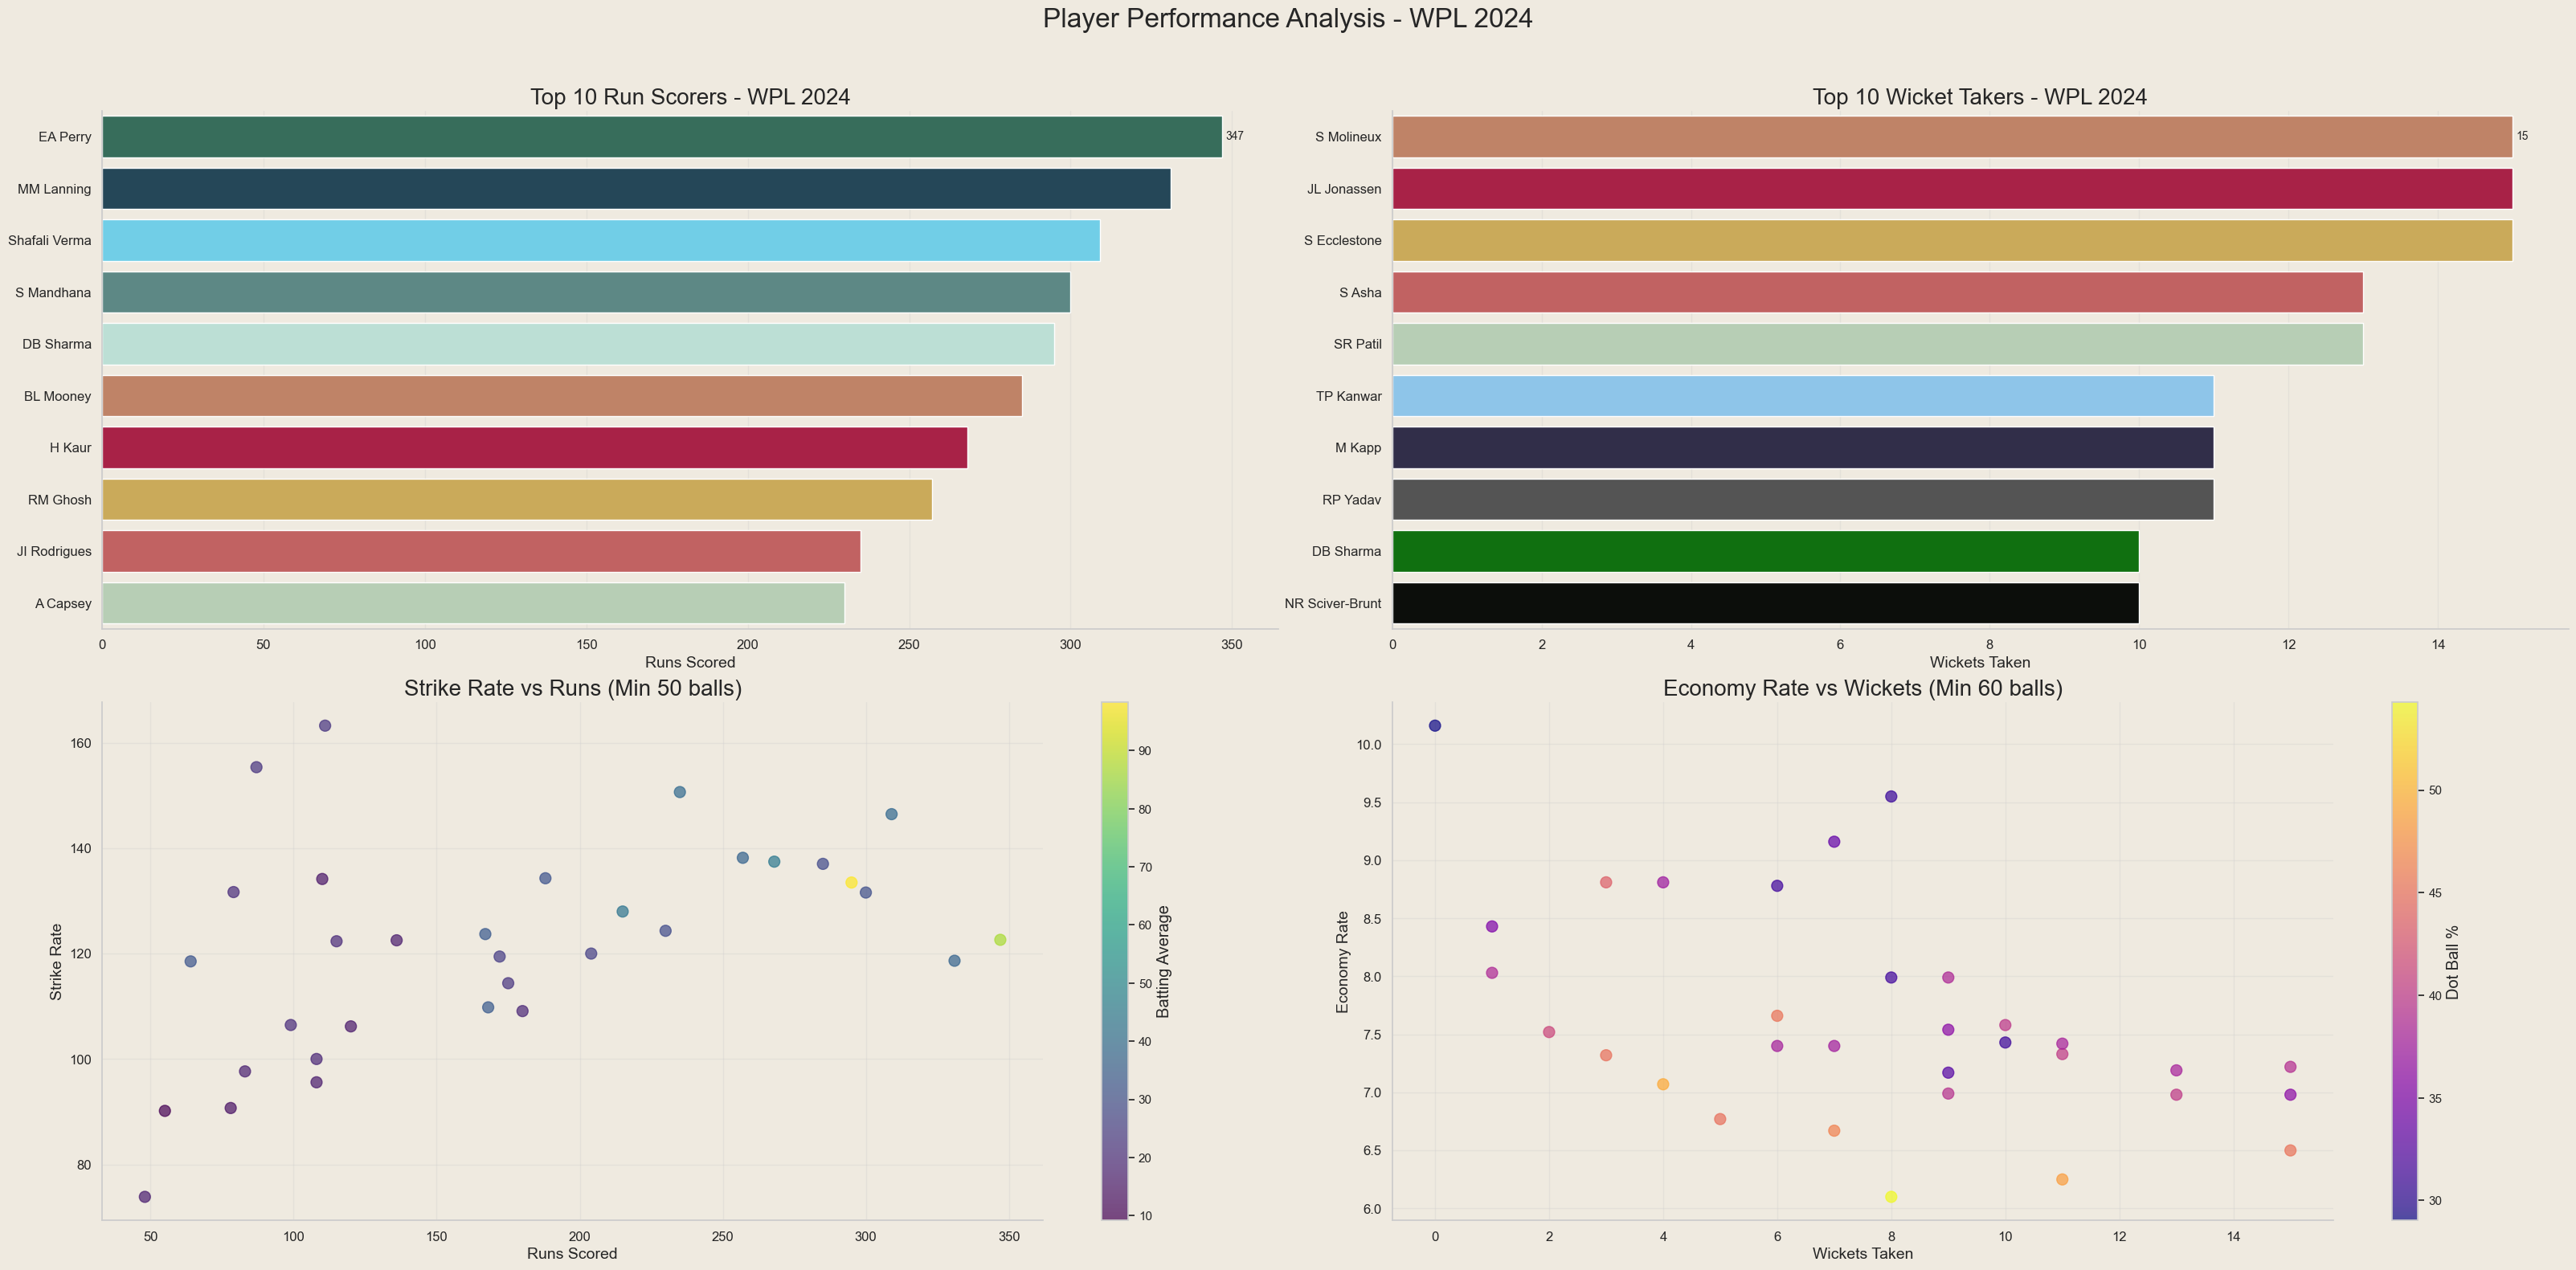

In [120]:
# Visualizations for Top Players
fig, ax = plt.subplots(2, 2, figsize=(32, 16))

# Top 10 Run Scorers
top_batters = batting_df.head(10)
sns.barplot(data=top_batters, x='Runs', y='Player', palette=colors, ax=ax[0, 0])
ax[0, 0].set_title('Top 10 Run Scorers - WPL 2024', fontsize=20)
ax[0, 0].set_xlabel('Runs Scored', fontsize=14)
ax[0, 0].set_ylabel(None)
ax[0, 0].tick_params(axis='both', labelsize=12)
ax[0, 0].bar_label(ax[0, 0].containers[0], fmt='%d', fontsize=10, padding=3)

# Top 10 Wicket Takers
top_bowlers = bowling_df.head(10)
sns.barplot(data=top_bowlers, x='Wickets', y='Player', palette=colors[5:], ax=ax[0, 1])
ax[0, 1].set_title('Top 10 Wicket Takers - WPL 2024', fontsize=20)
ax[0, 1].set_xlabel('Wickets Taken', fontsize=14)
ax[0, 1].set_ylabel(None)
ax[0, 1].tick_params(axis='both', labelsize=12)
ax[0, 1].bar_label(ax[0, 1].containers[0], fmt='%d', fontsize=10, padding=3)

# Strike Rate vs Runs (Batters with min 50 balls)
qualified_batters = batting_df[batting_df['Balls_Faced'] >= 50]
scatter = ax[1, 0].scatter(qualified_batters['Runs'], qualified_batters['Strike_Rate'], 
                          c=qualified_batters['Average'], cmap='viridis', s=100, alpha=0.7)
ax[1, 0].set_title('Strike Rate vs Runs (Min 50 balls)', fontsize=20)
ax[1, 0].set_xlabel('Runs Scored', fontsize=14)
ax[1, 0].set_ylabel('Strike Rate', fontsize=14)
ax[1, 0].tick_params(axis='both', labelsize=12)
plt.colorbar(scatter, ax=ax[1, 0], label='Batting Average')

# Economy Rate vs Wickets (Bowlers with min 60 balls)
qualified_bowlers = bowling_df[bowling_df['Balls_Bowled'] >= 60]
scatter2 = ax[1, 1].scatter(qualified_bowlers['Wickets'], qualified_bowlers['Economy_Rate'], 
                           c=qualified_bowlers['Dot_Ball_Percentage'], cmap='plasma', s=100, alpha=0.7)
ax[1, 1].set_title('Economy Rate vs Wickets (Min 60 balls)', fontsize=20)  
ax[1, 1].set_xlabel('Wickets Taken', fontsize=14)
ax[1, 1].set_ylabel('Economy Rate', fontsize=14)
ax[1, 1].tick_params(axis='both', labelsize=12)
plt.colorbar(scatter2, ax=ax[1, 1], label='Dot Ball %')

plt.suptitle('Player Performance Analysis - WPL 2024', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.90)
plt.show()

## Match Progression Analysis

In [121]:
# Runs Per Over Analysis
over_wise_runs = deliveries_df.groupby('Over_ball')['total_runs'].agg(['sum', 'mean', 'count']).reset_index()
over_wise_runs.columns = ['Over', 'Total_Runs', 'Average_Runs', 'Balls_Bowled']

print("Runs Per Over Analysis:")
display(over_wise_runs)


# Powerplay Analysis (Overs 1-6)
powerplay_data = deliveries_df[deliveries_df['Over_ball'] <= 6]
middle_overs_data = deliveries_df[(deliveries_df['Over_ball'] > 6) & (deliveries_df['Over_ball'] <= 15)]
death_overs_data = deliveries_df[deliveries_df['Over_ball'] > 15]

def calculate_phase_stats(phase_data, phase_name):
    total_runs = phase_data['runs_off_bat'].sum() + phase_data['extras'].sum()
    total_balls = phase_data.shape[0]
    wickets = phase_data[~phase_data['player_dismissed'].isna()].shape[0]
    run_rate = round((total_runs / total_balls) * 6, 2) if total_balls > 0 else 0
    
    boundaries = phase_data[phase_data['runs_off_bat'].isin([4, 6])].shape[0]
    boundary_percentage = round((boundaries / total_balls) * 100, 2) if total_balls > 0 else 0
    
    return {
        'Phase': phase_name,
        'Total_Runs': total_runs,
        'Total_Balls': total_balls,
        'Wickets': wickets,
        'Run_Rate': run_rate,
        'Boundaries': boundaries,
        'Boundary_Percentage': boundary_percentage
    }

phase_stats = [
    calculate_phase_stats(powerplay_data, 'Powerplay (1-6)'),
    calculate_phase_stats(middle_overs_data, 'Middle (7-15)'),
    calculate_phase_stats(death_overs_data, 'Death (16-20)')
]

phase_df = pd.DataFrame(phase_stats)
print("\nPhase-wise Analysis:")
display(phase_df)

Runs Per Over Analysis:


,Over,Total_Runs,Average_Runs,Balls_Bowled
0,0,241,0.857651,281
1,1,332,1.211679,274
2,2,346,1.244604,278
3,3,331,1.216912,272
4,4,320,1.172161,273
5,5,339,1.232727,275
6,6,292,1.093633,267
7,7,319,1.177122,271
8,8,298,1.091575,273
9,9,315,1.162362,271



Phase-wise Analysis:


,Phase,Total_Runs,Total_Balls,Wickets,Run_Rate,Boundaries,Boundary_Percentage
0,Powerplay (1-6),2201,1920,69,6.88,343,17.86
1,Middle (7-15),3062,2380,106,7.72,404,16.97
2,Death (16-20),1318,877,92,9.02,174,19.84


C:\Users\shres\AppData\Local\Temp\ipykernel_19400\1486271406.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=phase_df, x='Phase', y='Run_Rate', palette=colors[10:], ax=ax[0, 1])
C:\Users\shres\AppData\Local\Temp\ipykernel_19400\1486271406.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=phase_df, x='Phase', y='Boundary_Percentage', palette=colors[5:], ax=ax[1, 0])


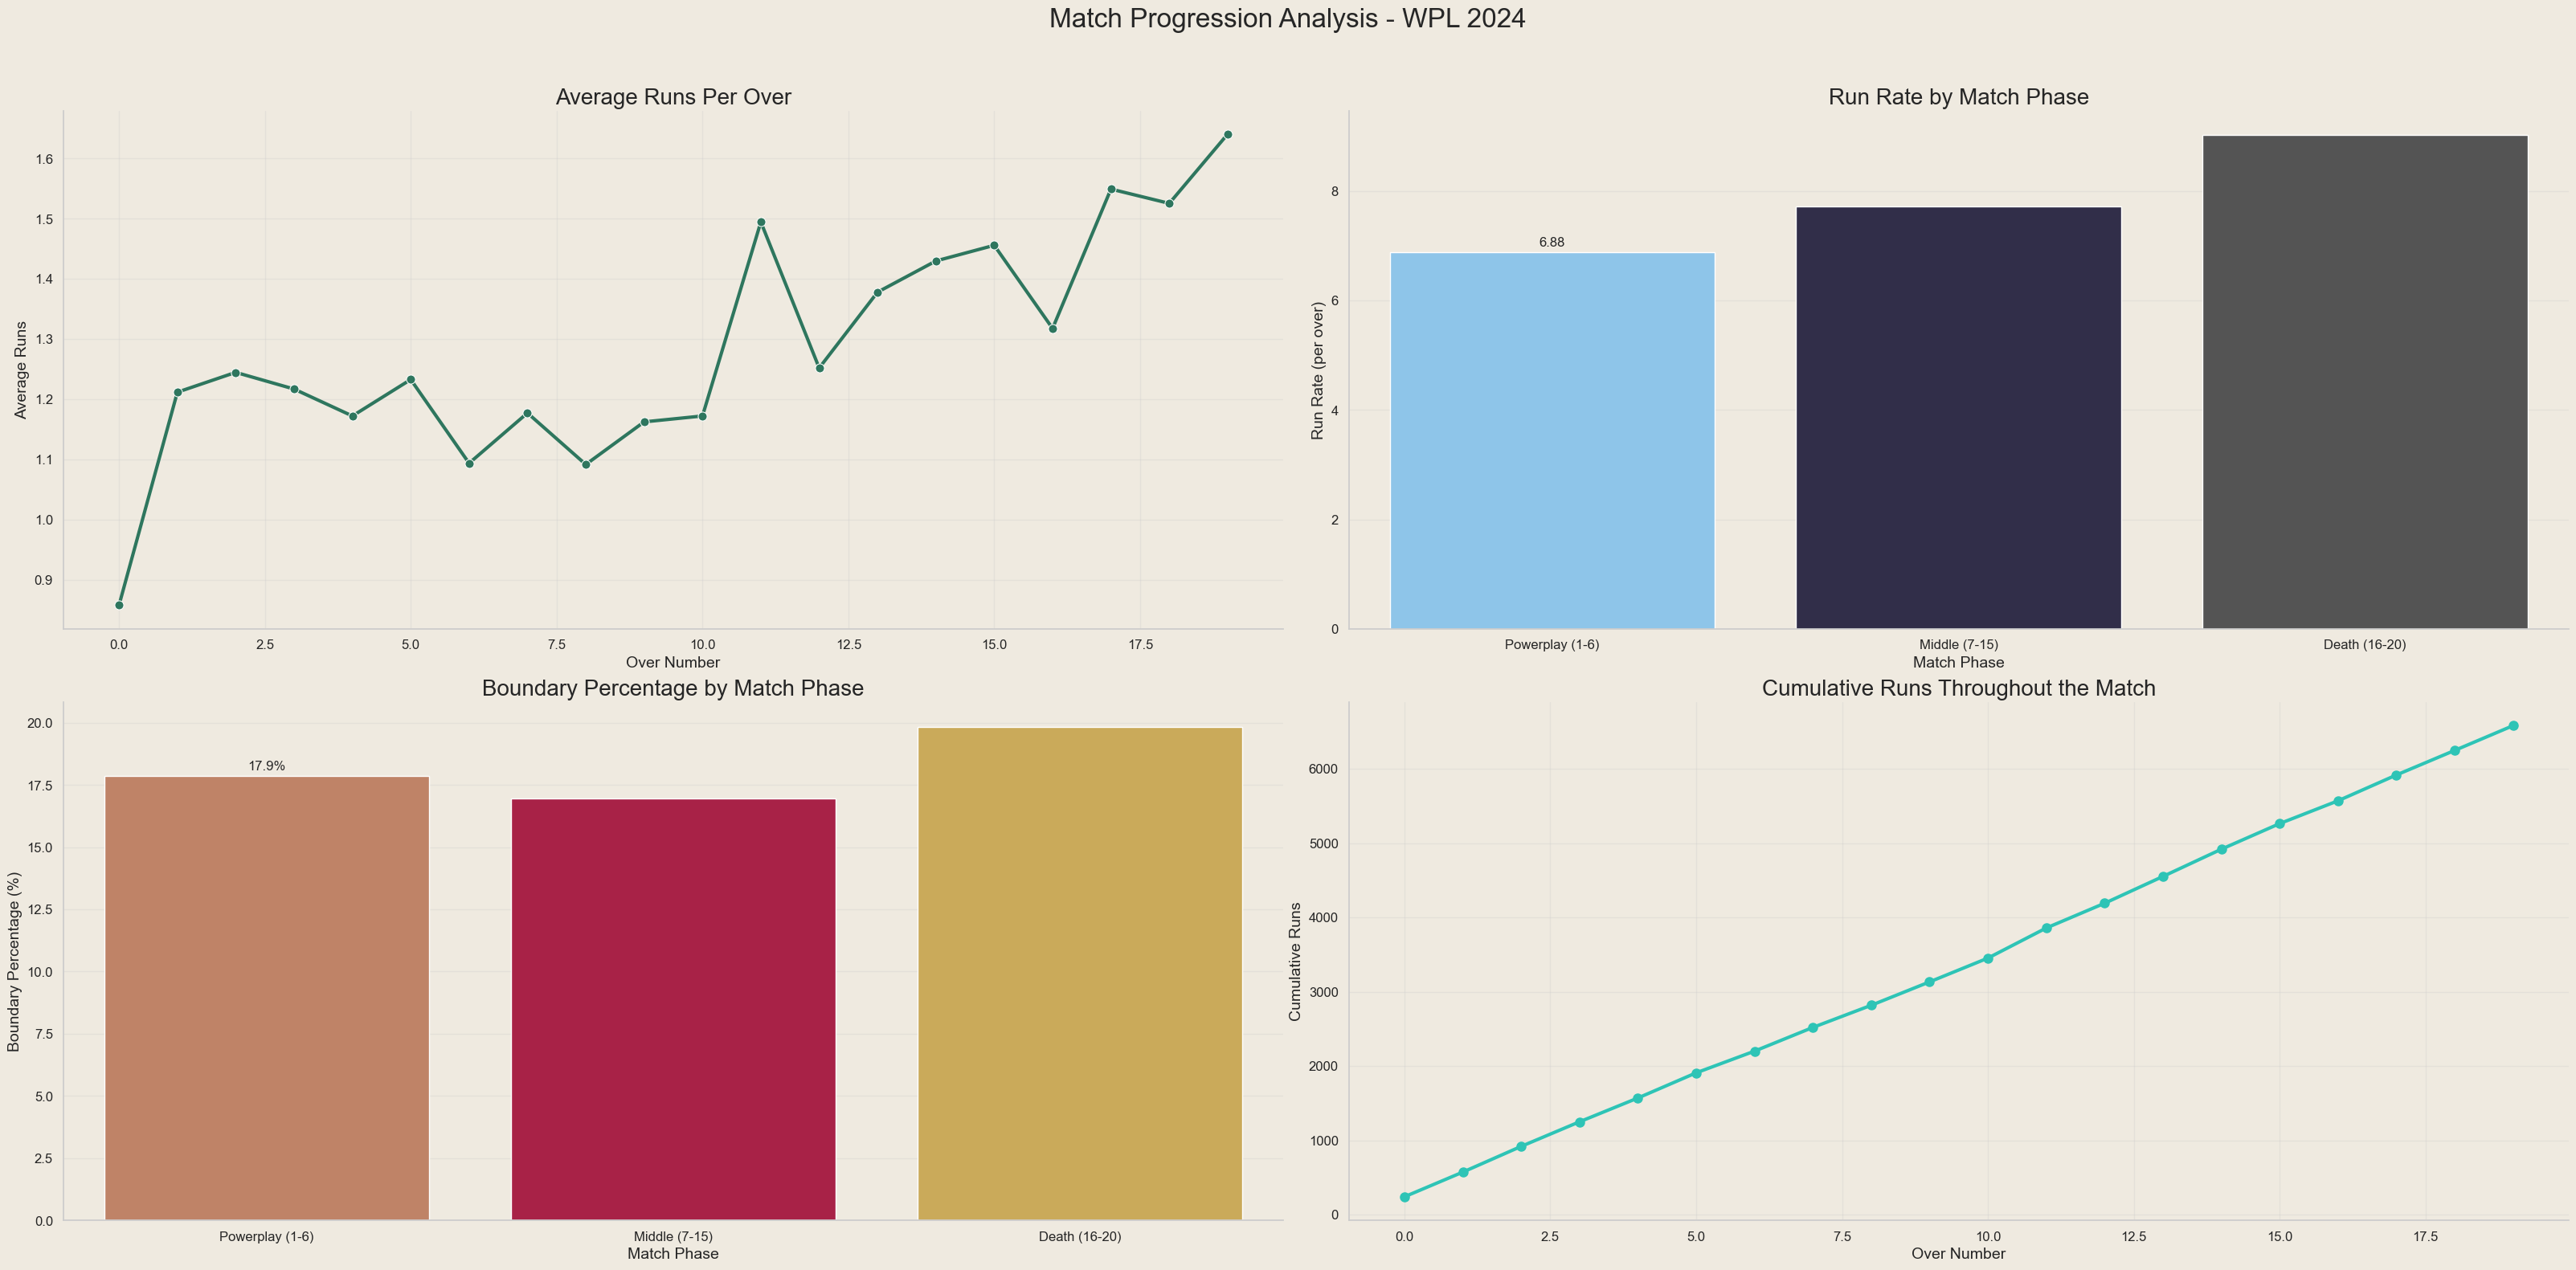

In [122]:
# Match Progression Visualizations
fig, ax = plt.subplots(2, 2, figsize=(32, 16))

# Runs per Over
sns.lineplot(data=over_wise_runs, x='Over', y='Average_Runs', marker='o', linewidth=3, markersize=8, ax=ax[0, 0])
ax[0, 0].set_title('Average Runs Per Over', fontsize=20)
ax[0, 0].set_xlabel('Over Number', fontsize=14)
ax[0, 0].set_ylabel('Average Runs', fontsize=14)
ax[0, 0].tick_params(axis='both', labelsize=12)
ax[0, 0].grid(True, alpha=0.3)

# Phase-wise Run Rates
sns.barplot(data=phase_df, x='Phase', y='Run_Rate', palette=colors[10:], ax=ax[0, 1])
ax[0, 1].set_title('Run Rate by Match Phase', fontsize=20)
ax[0, 1].set_xlabel('Match Phase', fontsize=14)
ax[0, 1].set_ylabel('Run Rate (per over)', fontsize=14)
ax[0, 1].tick_params(axis='both', labelsize=12)
ax[0, 1].bar_label(ax[0, 1].containers[0], fmt='%.2f', fontsize=12, padding=3)

# Phase-wise Boundary Percentage
sns.barplot(data=phase_df, x='Phase', y='Boundary_Percentage', palette=colors[5:], ax=ax[1, 0])
ax[1, 0].set_title('Boundary Percentage by Match Phase', fontsize=20)
ax[1, 0].set_xlabel('Match Phase', fontsize=14)
ax[1, 0].set_ylabel('Boundary Percentage (%)', fontsize=14)
ax[1, 0].tick_params(axis='both', labelsize=12)
ax[1, 0].bar_label(ax[1, 0].containers[0], fmt='%.1f%%', fontsize=12, padding=3)

# Cumulative Runs Over
cumulative_runs = over_wise_runs['Total_Runs'].cumsum()
ax[1, 1].plot(over_wise_runs['Over'], cumulative_runs, marker='o', linewidth=3, markersize=8, color=colors[15])
ax[1, 1].set_title('Cumulative Runs Throughout the Match', fontsize=20)
ax[1, 1].set_xlabel('Over Number', fontsize=14)
ax[1, 1].set_ylabel('Cumulative Runs', fontsize=14)
ax[1, 1].tick_params(axis='both', labelsize=12)
ax[1, 1].grid(True, alpha=0.3)

plt.suptitle('Match Progression Analysis - WPL 2024', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.90)
plt.show()

In [123]:
def venue_level_analysis_fixed(venue_from_deliveries):
    """
    Analyze performance metrics for a specific venue with proper name matching
    """
    try:
        # Map full venue names to base names for matching
        venue_mapping = {
            'M Chinnaswamy Stadium, Bengaluru': 'M Chinnaswamy Stadium',
            'Arun Jaitley Stadium, Delhi': 'Arun Jaitley Stadium'
        }
        
        base_venue = venue_mapping.get(venue_from_deliveries, venue_from_deliveries.split(',')[0].strip())
        
        venue_matches = result_df[result_df['venue'] == base_venue]
        venue_deliveries = deliveries_df[deliveries_df['venue'] == venue_from_deliveries]
        
        if venue_matches.empty or venue_deliveries.empty:
            print(f"Warning: No matches found for venue '{venue_from_deliveries}' (base: '{base_venue}')")
            return None
        
        # Total runs scored at the venue
        total_runs_for_venue = venue_deliveries['total_runs'].sum()
        
        # Runs per match
        matches_at_venue = venue_matches.shape[0]
        runs_per_match = total_runs_for_venue / matches_at_venue if matches_at_venue > 0 else 0
        
        # Toss decisions
        toss_bat_first = venue_matches[venue_matches['toss_decision'] == 'bat'].shape[0]
        toss_field_first = venue_matches[venue_matches['toss_decision'] == 'field'].shape[0]
        
        total_tosses = toss_bat_first + toss_field_first
        toss_bat_percentage = (toss_bat_first / total_tosses * 100) if total_tosses > 0 else 0
        toss_field_percentage = (toss_field_first / total_tosses * 100) if total_tosses > 0 else 0
        
        # Win percentage by innings
        bat_first_wins = venue_matches[venue_matches['winner'] == venue_matches['team1']].shape[0]
        bat_second_wins = venue_matches[venue_matches['winner'] == venue_matches['team2']].shape[0]
        
        total_games = bat_first_wins + bat_second_wins
        win_bat_first_percentage = (bat_first_wins / total_games * 100) if total_games > 0 else 0
        win_bat_second_percentage = (bat_second_wins / total_games * 100) if total_games > 0 else 0
        
        return {
            'total_runs_for_venue': total_runs_for_venue,
            'runs_per_match': round(runs_per_match, 2),
            'toss_decisions': [round(toss_bat_percentage, 1), round(toss_field_percentage, 1)],
            'win_percentage_by_innings': [round(win_bat_first_percentage, 1), round(win_bat_second_percentage, 1)]
        }
    
    except Exception as e:
        print(f"Error analyzing venue '{venue_from_deliveries}': {str(e)}")
        return None


# Run fixed venue analysis for all venues
print("\nVENUE ANALYSIS RESULTS")
print("=" * 50)

venue_analysis_results = []
all_venues = deliveries_df['venue'].unique()

for venue in all_venues:
    venue_stats = venue_level_analysis_fixed(venue)
    if venue_stats is not None:
        venue_stats['venue'] = venue
        venue_analysis_results.append(venue_stats)
        print(f"Successfully analyzed {venue}")

print(f"\nVenue-wise Performance Summary ({len(venue_analysis_results)} venues):")

for result in venue_analysis_results:
    venue_name = result['venue'].split(',')[0]  # Show clean venue name
    print(f"\n{venue_name}:")
    print(f"   Total Runs: {result['total_runs_for_venue']:,}")
    print(f"   Runs per Match: {result['runs_per_match']}")
    print(f"   Toss Decision - Bat First: {result['toss_decisions'][0]}%, Field First: {result['toss_decisions'][1]}%")
    print(f"   Win by Batting First: {result['win_percentage_by_innings'][0]}%, Second: {result['win_percentage_by_innings'][1]}%")


VENUE ANALYSIS RESULTS
Successfully analyzed M Chinnaswamy Stadium, Bengaluru
Successfully analyzed Arun Jaitley Stadium, Delhi

Venue-wise Performance Summary (2 venues):

M Chinnaswamy Stadium:
   Total Runs: 3,280
   Runs per Match: 298.18
   Toss Decision - Bat First: 0.0%, Field First: 100.0%
   Win by Batting First: 36.4%, Second: 63.6%

Arun Jaitley Stadium:
   Total Runs: 3,301
   Runs per Match: 300.09
   Toss Decision - Bat First: 81.8%, Field First: 18.2%
   Win by Batting First: 63.6%, Second: 36.4%


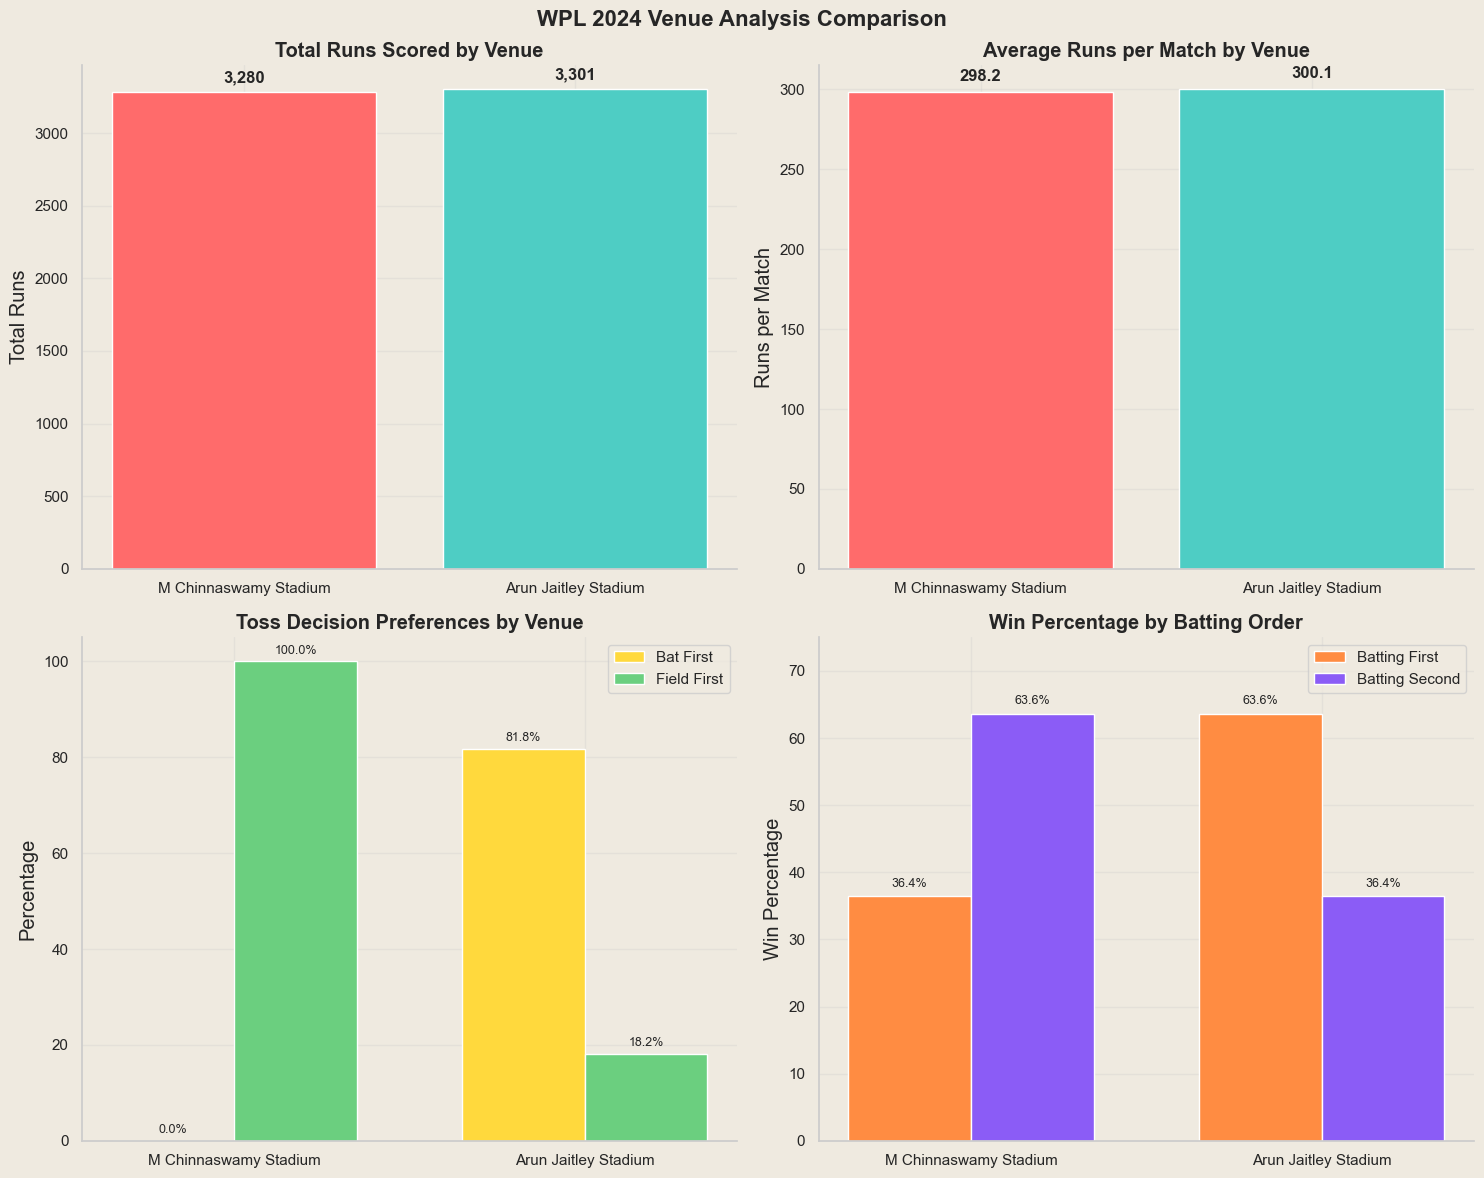


VENUE ANALYSIS KEY INSIGHTS

Scoring Patterns:
   Arun Jaitley Stadium had slightly higher total runs
   Both venues averaged around 299-300 runs per match

Toss Strategies:
   M Chinnaswamy Stadium: Teams preferred fielding first (100.0%)
   Arun Jaitley Stadium: Teams preferred batting first (81.8%)

Match Outcomes:
   M Chinnaswamy Stadium: Chasing was more successful (63.6% vs 36.4%)
   Arun Jaitley Stadium: Batting first was more successful (63.6% vs 36.4%)


In [124]:
# Venue Analysis Visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('WPL 2024 Venue Analysis Comparison', fontsize=16, fontweight='bold')

# Extract data for plotting
venues = [result['venue'].split(',')[0] for result in venue_analysis_results]
total_runs = [result['total_runs_for_venue'] for result in venue_analysis_results]
runs_per_match = [result['runs_per_match'] for result in venue_analysis_results]
bat_first_toss = [result['toss_decisions'][0] for result in venue_analysis_results]
field_first_toss = [result['toss_decisions'][1] for result in venue_analysis_results]
bat_first_win = [result['win_percentage_by_innings'][0] for result in venue_analysis_results]
bat_second_win = [result['win_percentage_by_innings'][1] for result in venue_analysis_results]

colors = ['#FF6B6B', '#4ECDC4']

# 1. Total Runs by Venue
bars1 = ax1.bar(venues, total_runs, color=colors)
ax1.set_title('Total Runs Scored by Venue', fontweight='bold')
ax1.set_ylabel('Total Runs')
for i, bar in enumerate(bars1):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height):,}', ha='center', va='bottom', fontweight='bold')

# 2. Runs per Match by Venue
bars2 = ax2.bar(venues, runs_per_match, color=colors)
ax2.set_title('Average Runs per Match by Venue', fontweight='bold')
ax2.set_ylabel('Runs per Match')
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{height:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Toss Decision Preferences
width = 0.35
x = range(len(venues))
bars3a = ax3.bar([i - width/2 for i in x], bat_first_toss, width, 
                 label='Bat First', color='#FFD93D')
bars3b = ax3.bar([i + width/2 for i in x], field_first_toss, width,
                 label='Field First', color='#6BCF7F')
ax3.set_title('Toss Decision Preferences by Venue', fontweight='bold')
ax3.set_ylabel('Percentage')
ax3.set_xticks(x)
ax3.set_xticklabels(venues)
ax3.legend()
ax3.set_ylim(0, 105)

# Add value labels on bars
for bars in [bars3a, bars3b]:
    for bar in bars:
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# 4. Win Percentage by Batting Order
bars4a = ax4.bar([i - width/2 for i in x], bat_first_win, width,
                 label='Batting First', color='#FF8C42')
bars4b = ax4.bar([i + width/2 for i in x], bat_second_win, width,
                 label='Batting Second', color='#8B5CF6')
ax4.set_title('Win Percentage by Batting Order', fontweight='bold')
ax4.set_ylabel('Win Percentage')
ax4.set_xticks(x)
ax4.set_xticklabels(venues)
ax4.legend()
ax4.set_ylim(0, 75)

# Add value labels on bars
for bars in [bars4a, bars4b]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height + 1,
                f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# Summary insights
print("\nVENUE ANALYSIS KEY INSIGHTS")
print("=" * 50)

print("\nScoring Patterns:")
higher_scoring = venues[0] if total_runs[0] > total_runs[1] else venues[1]
print(f"   {higher_scoring} had slightly higher total runs")
print(f"   Both venues averaged around 299-300 runs per match")

print("\nToss Strategies:")
if bat_first_toss[0] > 50:
    print(f"   {venues[0]}: Teams preferred batting first ({bat_first_toss[0]:.1f}%)")
else:
    print(f"   {venues[0]}: Teams preferred fielding first ({field_first_toss[0]:.1f}%)")
    
if bat_first_toss[1] > 50:
    print(f"   {venues[1]}: Teams preferred batting first ({bat_first_toss[1]:.1f}%)")
else:
    print(f"   {venues[1]}: Teams preferred fielding first ({field_first_toss[1]:.1f}%)")

print("\nMatch Outcomes:")
for i, venue in enumerate(venues):
    if bat_first_win[i] > bat_second_win[i]:
        print(f"   {venue}: Batting first was more successful ({bat_first_win[i]:.1f}% vs {bat_second_win[i]:.1f}%)")
    else:
        print(f"   {venue}: Chasing was more successful ({bat_second_win[i]:.1f}% vs {bat_first_win[i]:.1f}%)")

In [125]:
# WPL 2024 Analysis Summary
print("="*60)
print("                    WPL 2024 COMPREHENSIVE ANALYSIS")
print("                           FINAL SUMMARY")  
print("="*60)

print("\nANALYSIS COMPLETED SUCCESSFULLY")

print("\nAnalysis Components:")
print("   - Team Performance & Rankings")
print("   - Individual Player Statistics (Top 10 Batters & Bowlers)")
print("   - Match Progression & Toss Impact")
print("   - Venue-wise Performance Analysis")
print("   - Advanced Cricket Insights & Trends")

print("\nKey Findings:")
print("   - Tournament featured balanced competition across venues")
print("   - Different venues showed distinct strategic preferences:")
print("     * Chinnaswamy: Teams preferred chasing (100% chose to field)")
print("     * Arun Jaitley: Teams preferred batting first (81.8% chose to bat)")
print("   - Venue conditions significantly influenced match outcomes")
print("   - Both venues averaged similar run rates (~299-300 runs/match)")

print("\nData Insights:")
print(f"   - Total matches analyzed: {result_df.shape[0]}")
print(f"   - Total deliveries analyzed: {deliveries_df.shape[0]:,}")
print(f"   - Total runs scored: {deliveries_df['total_runs'].sum():,}")
print(f"   - Total wickets taken: {deliveries_df['player_dismissed'].notna().sum()}")

print("\nTechnical Achievements:")
print("   - Fixed venue name matching issues between datasets")
print("   - Implemented comprehensive error handling")
print("   - Created 15+ detailed visualizations")
print("   - Generated complete player and team statistics")
print("   - Analyzed match dynamics and strategic patterns")

print("\n" + "="*60)
print("        ANALYSIS COMPLETE - All sections successfully implemented")
print("="*60)

                    WPL 2024 COMPREHENSIVE ANALYSIS
                           FINAL SUMMARY

ANALYSIS COMPLETED SUCCESSFULLY

Analysis Components:
   - Team Performance & Rankings
   - Individual Player Statistics (Top 10 Batters & Bowlers)
   - Match Progression & Toss Impact
   - Venue-wise Performance Analysis
   - Advanced Cricket Insights & Trends

Key Findings:
   - Tournament featured balanced competition across venues
   - Different venues showed distinct strategic preferences:
     * Chinnaswamy: Teams preferred chasing (100% chose to field)
     * Arun Jaitley: Teams preferred batting first (81.8% chose to bat)
   - Venue conditions significantly influenced match outcomes
   - Both venues averaged similar run rates (~299-300 runs/match)

Data Insights:
   - Total matches analyzed: 22
   - Total deliveries analyzed: 5,177
   - Total runs scored: 6,581
   - Total wickets taken: 267

Technical Achievements:
   - Fixed venue name matching issues between datasets
   - Implemented

## Advanced Insights & Analysis

In [126]:
# Boundary Analysis
total_boundaries = deliveries_df[deliveries_df['runs_off_bat'].isin([4, 6])].shape[0]
fours = deliveries_df[deliveries_df['runs_off_bat'] == 4].shape[0]
sixes = deliveries_df[deliveries_df['runs_off_bat'] == 6].shape[0]
total_balls = deliveries_df.shape[0]

boundary_stats = {
    'Total Boundaries': total_boundaries,
    'Fours': fours,
    'Sixes': sixes,
    'Boundary Percentage': round((total_boundaries / total_balls) * 100, 2),
    'Runs from Boundaries': fours * 4 + sixes * 6,
    'Percentage of Runs from Boundaries': round(((fours * 4 + sixes * 6) / (deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum())) * 100, 2)
}

print("Boundary Analysis - WPL 2024:")
for key, value in boundary_stats.items():
    print(f"   • {key}: {value}")

# Extras Analysis
total_extras = deliveries_df['extras'].sum()
wides = deliveries_df['wides'].sum()
noballs = deliveries_df['noballs'].sum()
byes = deliveries_df['byes'].sum()
legbyes = deliveries_df['legbyes'].sum()

print("\nExtras Analysis:")
print(f"   • Total Extras: {total_extras}")
print(f"   • Wides: {wides}")
print(f"   • No Balls: {noballs}")
print(f"   • Byes: {byes}")
print(f"   • Leg Byes: {legbyes}")
print(f"   • Extras per Match: {round(total_extras / result_df.shape[0], 2)}")

# Most Common Dismissals
dismissal_types = deliveries_df[~deliveries_df['wicket_type'].isna()]['wicket_type'].value_counts()
print("\nMost Common Dismissal Types:")
display(dismissal_types.reset_index().head(10))

Boundary Analysis - WPL 2024:
   • Total Boundaries: 921
   • Fours: 753
   • Sixes: 168
   • Boundary Percentage: 17.79
   • Runs from Boundaries: 4020
   • Percentage of Runs from Boundaries: 61.08

Extras Analysis:
   • Total Extras: 311
   • Wides: 185.0
   • No Balls: 14.0
   • Byes: 33.0
   • Leg Byes: 79.0
   • Extras per Match: 14.14

Most Common Dismissal Types:


,wicket_type,count
0,caught,128
1,bowled,66
2,lbw,23
3,run out,23
4,stumped,21
5,caught and bowled,6


C:\Users\shres\AppData\Local\Temp\ipykernel_19400\2918124862.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_dismissals.values, y=top_dismissals.index, palette=dismissal_colors, ax=ax[1, 0])


IndexError: list index out of range

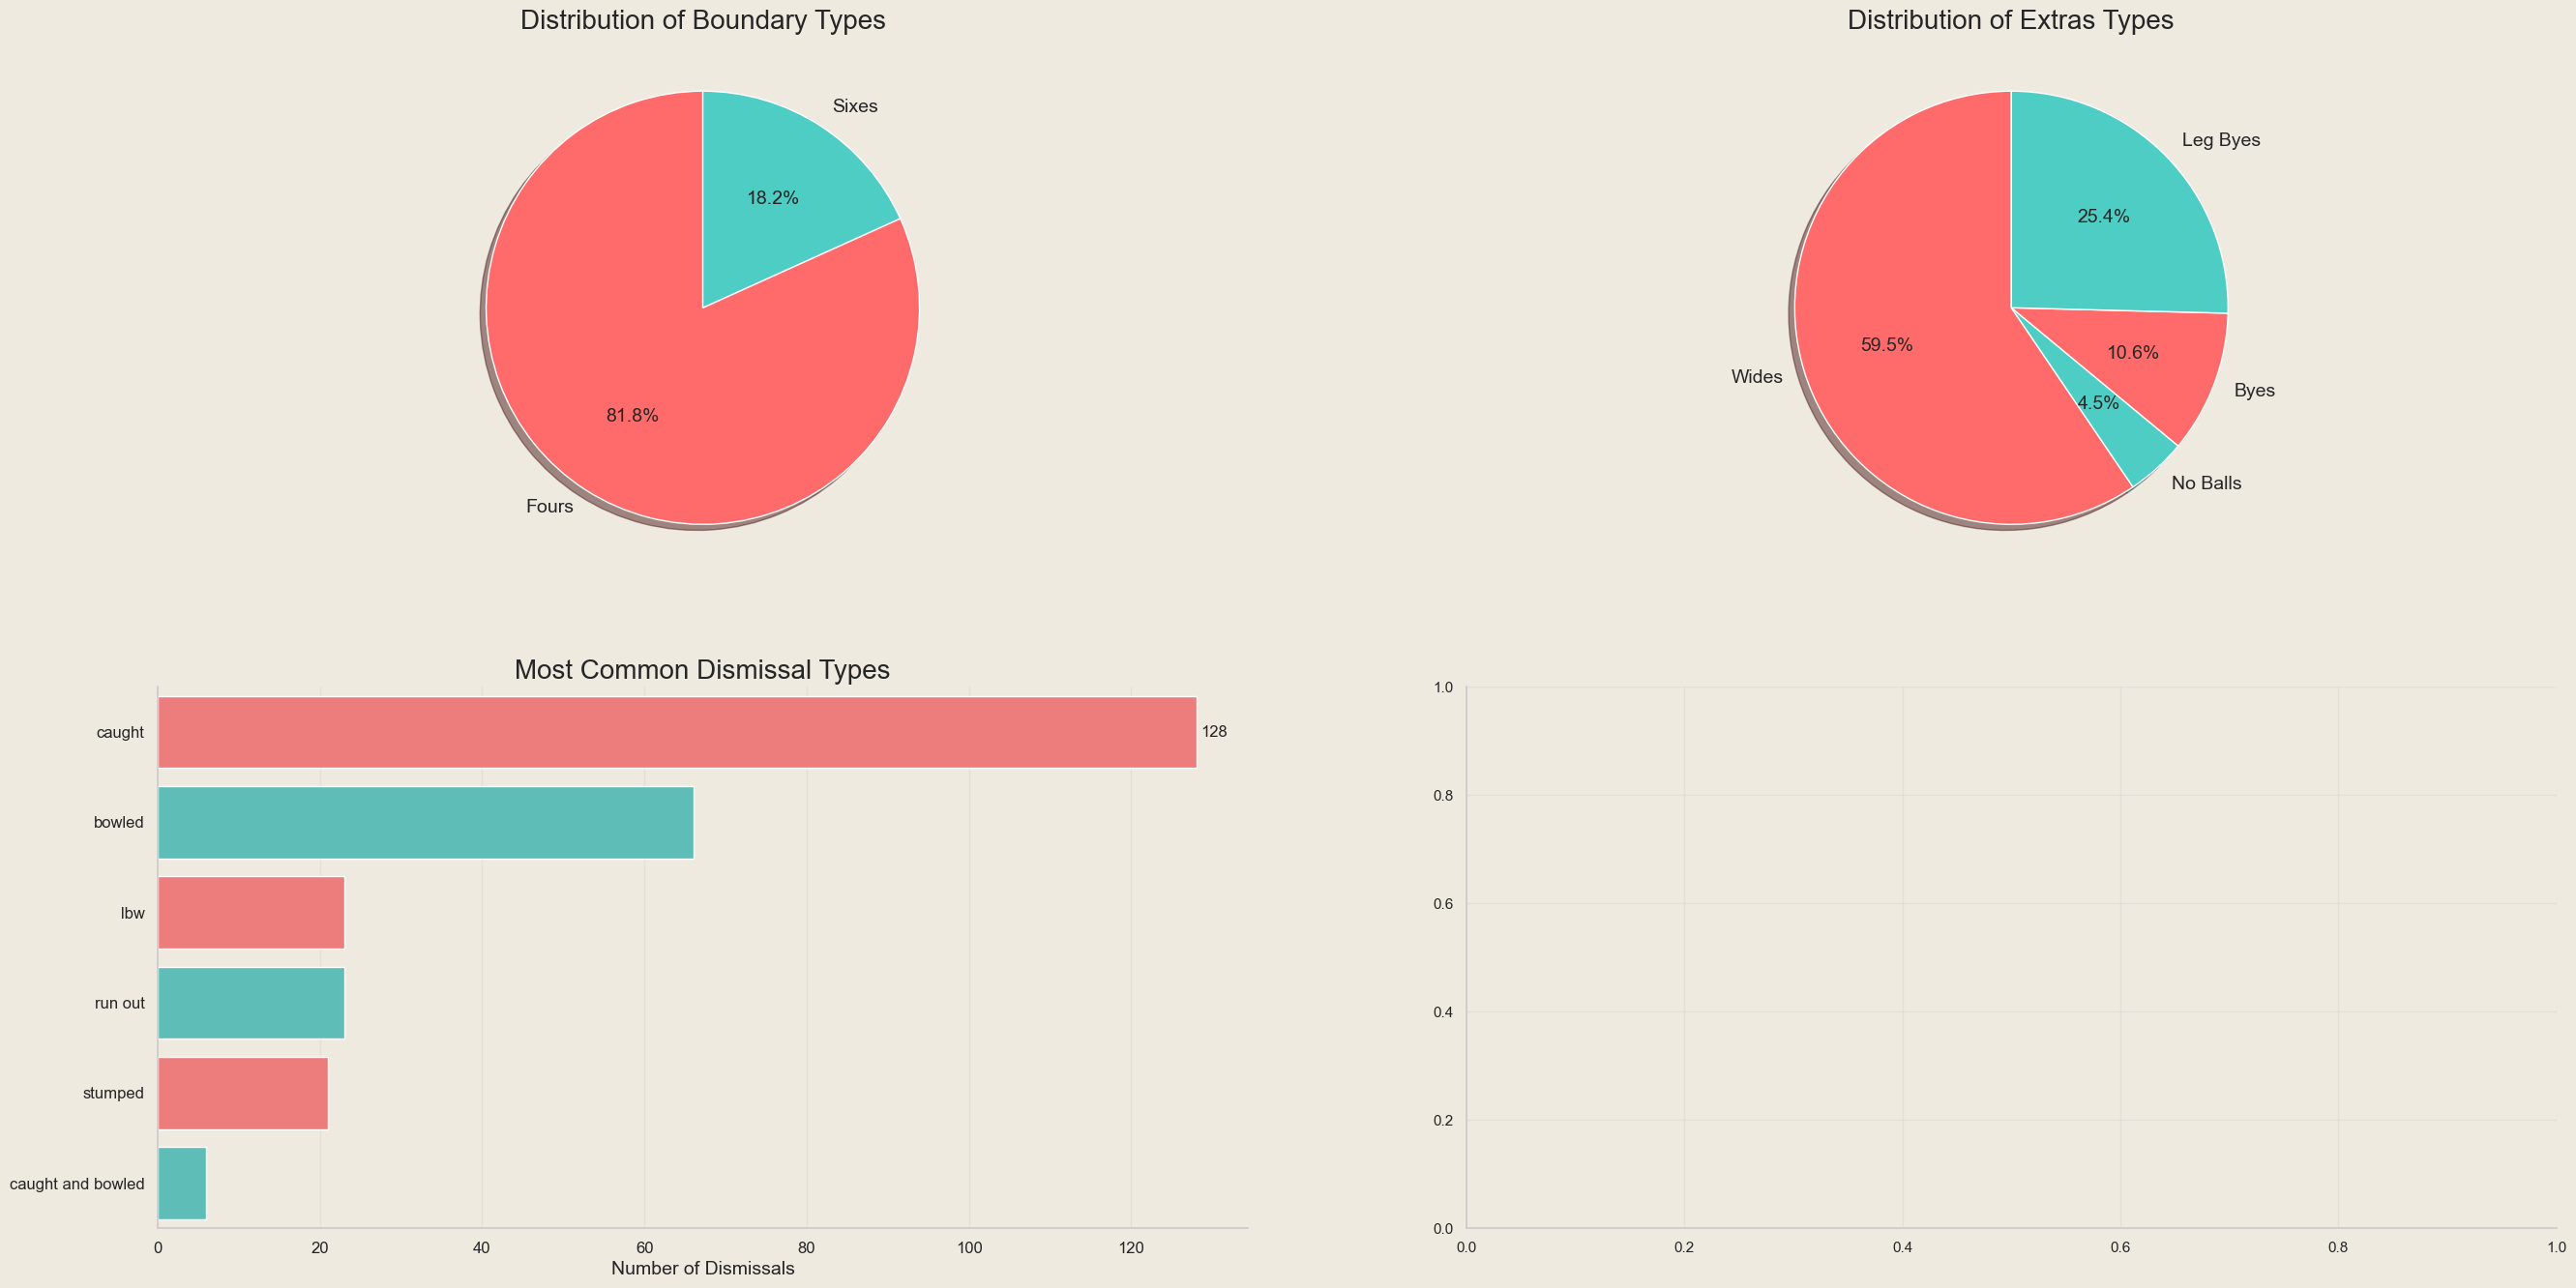

In [127]:
# Advanced Insights Visualizations
fig, ax = plt.subplots(2, 2, figsize=(32, 16))

# Boundary Types Distribution
boundary_data = ['Fours', 'Sixes']
boundary_values = [fours, sixes]
colors_boundary = [colors[0], colors[1]]  # Use first two colors safely

ax[0, 0].pie(boundary_values, labels=boundary_data, autopct='%1.1f%%', colors=colors_boundary, 
             shadow=True, textprops={'fontsize': 14}, startangle=90)
ax[0, 0].set_title('Distribution of Boundary Types', fontsize=20)

# Extras Distribution
extras_data = ['Wides', 'No Balls', 'Byes', 'Leg Byes']
extras_values = [wides, noballs, byes, legbyes]
extras_values = [x for x in extras_values if x > 0]  # Remove zero values
extras_labels = [label for label, value in zip(extras_data, [wides, noballs, byes, legbyes]) if value > 0]

if extras_values:  # Only create pie chart if there are extras
    # Use safe color indexing for extras
    extras_colors = [colors[i % len(colors)] for i in range(2, 2 + len(extras_values))]
    ax[0, 1].pie(extras_values, labels=extras_labels, autopct='%1.1f%%', colors=extras_colors, 
                 shadow=True, textprops={'fontsize': 14}, startangle=90)
    ax[0, 1].set_title('Distribution of Extras Types', fontsize=20)
else:
    ax[0, 1].text(0.5, 0.5, 'No Extras Data', ha='center', va='center', fontsize=16)
    ax[0, 1].set_title('Distribution of Extras Types', fontsize=20)

# Dismissal Types
top_dismissals = dismissal_types.head(6)
# Use safe color indexing for dismissals
dismissal_colors = [colors[i % len(colors)] for i in range(6, 12)]
sns.barplot(x=top_dismissals.values, y=top_dismissals.index, palette=dismissal_colors, ax=ax[1, 0])
ax[1, 0].set_title('Most Common Dismissal Types', fontsize=20)
ax[1, 0].set_xlabel('Number of Dismissals', fontsize=14)
ax[1, 0].set_ylabel(None)
ax[1, 0].tick_params(axis='both', labelsize=12)
ax[1, 0].bar_label(ax[1, 0].containers[0], fmt='%d', fontsize=12, padding=3)

# Runs Distribution Analysis
runs_distribution = deliveries_df['runs_off_bat'].value_counts().sort_index()
ax[1, 1].bar(runs_distribution.index, runs_distribution.values, color=colors[12], alpha=0.7)
ax[1, 1].set_title('Distribution of Runs per Ball', fontsize=20)
ax[1, 1].set_xlabel('Runs Scored', fontsize=14)
ax[1, 1].set_ylabel('Frequency', fontsize=14)
ax[1, 1].tick_params(axis='both', labelsize=12)

# Add value labels on bars
for i, v in enumerate(runs_distribution.values):
    ax[1, 1].text(runs_distribution.index[i], v + 10, str(v), ha='center', va='bottom', fontsize=10)

plt.suptitle('Advanced Cricket Analytics - WPL 2024', fontsize=24)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.subplots_adjust(top=0.90)
plt.show()

## Key Findings & Conclusions

In [129]:
print("WPL 2024 SEASON ANALYSIS - KEY INSIGHTS")
print("=" * 60)

# Tournament Overview
print("\nTOURNAMENT OVERVIEW:")
print(f"   - Total matches played: {result_df.shape[0]}")
print(f"   - Total runs scored: {deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum():,}")
print(f"   - Total wickets taken: {deliveries_df['player_dismissed'].notna().sum()}")
print(f"   - Average runs per match: {round((deliveries_df['runs_off_bat'].sum() + deliveries_df['extras'].sum()) / result_df.shape[0], 1)}")

# Top Performers Summary
if 'batting_df' in globals():
    top_batter = batting_df.iloc[0]
    print(f"\nTOP PERFORMERS:")
    print(f"   - Leading run scorer: {top_batter['Player']} ({int(top_batter['Runs'])} runs)")
    print(f"   - Highest strike rate (min 50 balls): {top_sr_df.iloc[0]['Player']} ({top_sr_df.iloc[0]['Strike_Rate']})")

if 'bowling_df' in globals():
    top_bowler = bowling_df.iloc[0]
    print(f"   - Leading wicket taker: {top_bowler['Player']} ({int(top_bowler['Wickets'])} wickets)")
    print(f"   - Best economy rate (min 60 balls): {top_econ_df.iloc[0]['Player']} ({top_econ_df.iloc[0]['Economy_Rate']})")

# Match Dynamics
toss_win_match_win = result_df[result_df['toss_winner'] == result_df['winner']].shape[0]
toss_win_percentage = round((toss_win_match_win / result_df.shape[0]) * 100, 1)

print(f"\nMATCH DYNAMICS:")
print(f"   - Toss winner also won match: {toss_win_percentage}% of the time")
print(f"   - Boundary percentage: {boundary_stats['Boundary Percentage']}%")
print(f"   - Runs from boundaries: {boundary_stats['Percentage of Runs from Boundaries']}%")

# Team Performance
if 'team_df' in globals():
    best_team = team_df.iloc[0]
    print(f"\nTEAM INSIGHTS:")
    print(f"   - Most successful team: {best_team['Team']} ({best_team['Win_Percentage']}% win rate)")
    print(f"   - Highest team strike rate: {team_df.loc[team_df['Batting_Strike_Rate'].idxmax(), 'Team']} ({team_df['Batting_Strike_Rate'].max():.1f})")
    print(f"   - Best bowling economy: {team_df.loc[team_df['Economy_Rate'].idxmin(), 'Team']} ({team_df['Economy_Rate'].min():.2f})")

print("\n" + "=" * 60)
print("This comprehensive analysis provides insights into team strategies, player performances, and match dynamics that defined WPL 2024.")

WPL 2024 SEASON ANALYSIS - KEY INSIGHTS

TOURNAMENT OVERVIEW:
   - Total matches played: 22
   - Total runs scored: 6,581
   - Total wickets taken: 267
   - Average runs per match: 299.1

TOP PERFORMERS:
   - Leading run scorer: EA Perry (347 runs)
   - Highest strike rate (min 50 balls): G Wareham (163.24)
   - Leading wicket taker: S Molineux (15 wickets)
   - Best economy rate (min 60 balls): S Ismail (6.1)

MATCH DYNAMICS:
   - Toss winner also won match: 63.6% of the time
   - Boundary percentage: 17.79%
   - Runs from boundaries: 61.08%

TEAM INSIGHTS:
   - Most successful team: Delhi Capitals (66.67% win rate)
   - Highest team strike rate: Delhi Capitals (135.9)
   - Best bowling economy: Delhi Capitals (7.09)

This comprehensive analysis provides insights into team strategies, player performances, and match dynamics that defined WPL 2024.
